# Data Tools

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
# from preprocess import cubic_smooth, baseline_shift, read_file
# from preprocess import threshold_cutoff, savgol_filter
import warnings
import textwrap
import ast
from IPython.display import display, Markdown
from scipy.integrate import odeint
from scipy import interpolate

class DataTools:

    amax = 5 # Datatools class attribute. It is inherited by child class Incremental
             # Max. allowed attempts for incorrect data entered by user

    def __init__(self):
        self.N = None   # Stoichiometric Matrix
        self.Na = None  # Stoichiometric Matrix (available species)
        self.Nu = None  # Stoichiometric Matrix (unavailable species)
        self.R = None   # Num Reactions
        self.S = None   # Num Species
        self.Mw = None  # Mol Weight kg/kmol
        self.V = None   # volume
        self.Winhat = None # mass frac composition of inlet
        self.Win = None # inlet composition
        self.Wina = None # inlet composition (available species)
        self.Winu = None # inlet composition (unavailable species)
        self.P = None # no of inlets
        self.uin = None # inlet flowrate (kg/time)
        self.uout = None # outlet flowrate (kg/time)
        self.n0 = None # initial no of moles
        self.n0a = None # initial no of moles (available species)
        self.n0u = None # initial no of moles (unavailable species)
        self.time = None
        self.methodology = None


    """

    <<<     OLDER FUNCTION WITH INPUTS    >>>


    def add_reactor_config_flag(self):

        str_0a = ("Enter reactor configuration as a number. Permitted entries: 1 = Batch; 2 = Semi-Batch;"
                " 3 = CSTR.")
        str_0b = "Enter reactor configuration:"
        str_r = "Enter reactor configuration again:"

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(str_0a)
                self.rc_flag = input(str_0b)
            else:
                self.rc_flag = input(str_r)

            print("Entered reactor configuration is:", self.rc_flag)

            try:
                self.rc_flag = ast.literal_eval(self.rc_flag) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.rc_flag,int): # rc_flag is not an integer
                print("Entered object is not an integer. Reactor configuration must be an integer.")
                continue

            # No need to check for np.nan due to this check
            if isinstance(self.rc_flag,int) and self.rc_flag != 1 and self.rc_flag != 2 and self.rc_flag != 3:
                print("Invalid value of reactor configuration has been entered. Allowed values are: 1 = Batch; 2 = Semi-Batch; 3 = CSTR.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data for reactor configuration received successfully.**"))
                break

        """
    

    

    def add_reactor_config_flag(self, rc_value):
        """
        Validates and stores the reactor configuration flag.
        Allowed values:
        1 = Batch
        2 = Semi-Batch
        3 = CSTR
        """

        if isinstance(rc_value, str):
            try:
                rc_value = ast.literal_eval(rc_value)
            except Exception as emsg:
                raise ValueError(
                f"Reactor configuration could not be parsed as a Python literal: {emsg}")

    
        if not isinstance(rc_value, int) or isinstance(rc_value, bool):
            raise TypeError(
            "Reactor configuration must be an integer: 1 (Batch), 2 (Semi-Batch), or 3 (CSTR).")

    
        if rc_value not in (1, 2, 3):
            raise ValueError(
            "Invalid reactor configuration. Allowed values: 1 = Batch, 2 = Semi-Batch, 3 = CSTR.")

   
        self.rc_flag = rc_value
        display(Markdown("**Data for reactor configuration received successfully.**"))




    """

    <<<    OLDER FUNCTION WITH INPUTS    >>>


    def add_number_reactions(self):

        str_0 = ("Enter the number of reactions in the reaction system:")
        str_r = "Enter the number of reactions in the reaction system again:"

        for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                self.R = input(str_0)
            else:
                self.R = input(str_r)

            print("Entered value of number of reactions is:", self.R)

            try:
                self.R = ast.literal_eval(self.R) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.R,int): # self.R is not an integer
                print("Entered object is not an integer. Number of reactions must be an integer.")
                continue

            if isinstance(self.R,int) and self.R <= 0:
                print("Entered value is either zero or negative. Number of reactions must be a positive integer.")
                continue

            # Check is unnecessary as along as ast.literal_eval is used
            # np.nan is an invalid python expression
            # "np.nan" converts it to string data type
            if np.isnan(self.R) == True:
                print("A NaN value has been entered. NaN value is not allowed.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data for number of reactions received successfully.**"))
                break

    """


    def add_number_reactions(self, R_value):
        """
        Validates and stores the number of reactions.
        Must be a strictly positive integer.
        """

    
        if isinstance(R_value, str):
            try:
                R_value = ast.literal_eval(R_value)
            except Exception as emsg:
                raise ValueError(
                f"Number of reactions could not be parsed as a Python literal: {emsg}")

        if not isinstance(R_value, int) or isinstance(R_value, bool):
            raise TypeError("Number of reactions must be a positive integer.")

  
        if R_value <= 0:
            raise ValueError("Number of reactions must be a strictly positive integer.")

  
        self.R = R_value
        display(Markdown("**Data for number of reactions received successfully.**"))

    def add_number_species(self, S_value):
        """
        Validates and stores the number of species.
        Must be a strictly positive integer.
        """

    
        if isinstance(S_value, str):
            try:
                S_value = ast.literal_eval(S_value)
            except Exception as emsg:
                raise ValueError(
                f"Number of species could not be parsed as a Python literal: {emsg}")

        if not isinstance(S_value, int) or isinstance(S_value, bool):
            raise TypeError("Number of species must be a positive integer.")

  
        if S_value <= 0:
            raise ValueError("Number of species must be a strictly positive integer.")

  
        self.S = S_value
        display(Markdown("**Data for number of species received successfully.**"))

    

    """

    <<< OLDER FUNCTION WITH INPUTS >>>


    def add_stoichio(self):

        str_0a = ("Enter Stoichiometric Matrix as a two-dimensional list. For reaction system with "
                  "two reactions R1: A -> 2B and R2: 3 A -> 4 C, the stoichiometric matrix is "
                  "[[-1,2,0],[-3,0,4]]. In the stoichiometric matrix, the order of reactions is R1, R2 "
                  "and the order of species is A, B, C.")
        str_0b = "Enter Stoichiometric Matrix:"
        str_r = "Enter Stoichiometric Matrix again:"

        for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                self.N = input(str_0b)
            else:
                self.N = input(str_r)

            print("Entered stoichiometric matrix is:", self.N)

            try:
                self.N = ast.literal_eval(self.N) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.N,list): # N is not a list
                print("Entered object is not a list.")
                continue

            try:
                self.N = np.array(self.N) # Convert N to numpy array
            except Exception as emsg: # List N could not be converted to numpy array
                print("Unable to convert input to numpy array, possibly due to inhomogeneous shape i.e. unequal number of columns across rows.")
                print("Further information:")
                print(emsg)
                continue

            if not (np.issubdtype(self.N.dtype,np.number)):
                print("Elements of stoichiometric matrix must be numbers.")
                continue

            if not np.all(np.isreal(self.N)):
                print("Some elements of stoichiometric matrix are complex.")
                continue

            if self.N.ndim != 2:
                print("Number of dimensions of stoichiometric matrix is not equal to 2.")
                continue

            if self.N.shape[0] != self.R:
                print(f"Number of rows of stoichiometric matrix is {self.N.shape[0]}, which is not equal to the number of reactions {self.R}, entered previously.")
                continue

            if self.N.shape[1] != self.S:
                print(f"Number of columns of stoichiometric matrix is {self.N.shape[1]}, which is not equal to the number of species {self.S}, entered previously.")
                continue

            # Check is unnecessary as along as ast.literal_eval is used
            # np.nan as an element of N is an invalid python expression
            # "np.nan" as an element of N converts it to string data type
            # [[1,,]] is an invalid python expression
            if np.any(np.isnan(self.N)) == True:
                print("At least one element in the stoichiometric matrix is a NaN value. NaN values are not allowed.")
                continue

            if not all(np.any(self.N < 0, axis=1)) == True:
                print("At least one element in each row of the stoichiometric matrix must be negative.")
                continue

            if not all(np.any(self.N > 0, axis=1)) == True:
                print("At least one element in each row of the stoichiometric matrix must be positive.")
                continue

            # If at least one element in each row of the stoichiometric matrix is
            # negative/positive, the corresponding row is non-zero.
            # Hence, no need to check for a zero row.

            if np.any(np.all(self.N==0,axis=0)==True) == True:
                print("At least one column in the stoichiometric matrix is a column of zeros. Columns of zeros are not allowed.")
                continue

            # If some elements of stoichiometric matrix is/are type float, then all
            # integer elements are converted to type float. Hence the following logic
            # to check whether all negative elements are integers.

            Nn = self.N[self.N<0] # Extract all negative elements to a numpy array
            Nnr = np.array(list(map(int,Nn))) # Negative elements rounded to nearest integer
            dN = Nn - Nnr
            if not np.all(dN==0):
                print("All negative elements of stoichiometric matrix must be integers.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data for stoichiometric matrix received successfully.**"))
                self.S_l = [chr(x) for x in range(65, 65 + self.S)] # ordered
                self.S_s = set(self.S_l) # unordered
                display(Markdown(f"**Reacting species have been assigned the following names: {self.S_l} in the same order in which they appear in the columns of the stoichiometric matrix.**"))
                break


    """
    def add_stoichio(self, N_value):
        """
        Validates and stores the stoichiometric matrix N without using input().
        N_value may be a Python object or string; literal_eval is attempted if string.
        """

        # Attempt to parse literal if user passed a string
        if isinstance(N_value, str):
            try:
                N_value = ast.literal_eval(N_value)
            except Exception as emsg:
                raise ValueError(f"Provided object cannot be parsed as a Python literal: {emsg}")

        # Must be a list before NumPy conversion
        if not isinstance(N_value, list):
            raise TypeError("Stoichiometric matrix must be provided as a list of lists.")

        # Convert to numpy array
        try:
            N = np.array(N_value)
        except Exception as emsg:
            raise ValueError("Input cannot be converted to a homogeneous NumPy array. "
            "This usually indicates unequal row lengths.") from emsg

        # Must contain numeric values
        if not np.issubdtype(N.dtype, np.number):
            raise TypeError("All elements of the stoichiometric matrix must be numeric.")

        # No complex numbers
        if not np.all(np.isreal(N)):
            raise ValueError("Stoichiometric matrix contains complex numbers, which are not allowed.")

        # Must be 2D
        if N.ndim != 2:
            raise ValueError("Stoichiometric matrix must be two-dimensional.")

        # Number of rows = number of reactions
        if N.shape[0] != self.R:
            raise ValueError(f"Stoichiometric matrix has {N.shape[0]} rows, but {self.R} reactions were specified.")

        # Number of columns = number of species
        if N.shape[1] != self.S:
            raise ValueError(f"Stoichiometric matrix has {N.shape[1]} columns, but {self.S} species were specified.")

        # No NaN values (this is redundant with literal_eval, but preserved for fidelity)
        if np.any(np.isnan(N)):
            raise ValueError("Stoichiometric matrix contains NaN values, which are not allowed.")

        # Each row must contain at least one negative coefficient
        if not all(np.any(N < 0, axis=1)):
            raise ValueError("Each reaction row must contain at least one negative stoichiometric coefficient.")

        # Each row must contain at least one positive coefficient
        if not all(np.any(N > 0, axis=1)):
            raise ValueError("Each reaction row must contain at least one positive stoichiometric coefficient.")

        # No column of all zeros
        if np.any(np.all(N == 0, axis=0)):
            raise ValueError("At least one species column consists entirely of zeros, which is not allowed.")

        # Negative entries must be integers
        Nn = N[N < 0]     # All negative elements
        Nnr = np.array(list(map(int, Nn)))  # Rounded integers
        dN = Nn - Nnr
        if not np.all(dN == 0):
            raise ValueError("All negative stoichiometric coefficients must be integers.")

        # All checks passed
        self.N = N
        display(Markdown("**Data for stoichiometric matrix received successfully.**"))

        # Assign species names
        self.S_l = [chr(x) for x in range(65, 65 + self.S)]
        self.S_s = set(self.S_l)

        display(Markdown(f"**Reacting species have been assigned the following names: {self.S_l} " "in the same order in which they appear in the columns of the stoichiometric matrix.**"))


    """ 
    <<< OLDER FUNCTION WITH INPUTS >>>

    def add_rxn_rev(self):

        str_0a = ("Enter reaction reversibility information as a one-dimensional list. Enter 0 for "
                  "irreversible reaction and 1 for reversible reaction. For reaction system with 2 "
                  "reactions, where reaction 1 is irreversible and reaction 2 is reversible, enter [0,1]. "
                  "The order of reactions should be the same as the order in which they appear in the"
                  " rows of the stoichiometric matrix.")
        str_0b = "Enter reaction reversibility information:"
        str_r = "Enter reaction reversibility information again:"

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                self.rrv = input(str_0b)
            else:
                self.rrv = input(str_r)

            print("User input is:", self.rrv)

            try:
                self.rrv = ast.literal_eval(self.rrv) # Evaluate user input
                self.rrv = [int(x) for x in self.rrv]
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.rrv,list): # N is not a list
                print("Entered object is not a list.")
                continue

            if len(self.rrv) != self.N.shape[0]:
                print("The number of elements in the list is not equal to the number of rows of the stoichiometric matrix.")
                continue


            # This check negates the need to check for NaN values
            if not set(self.rrv).issubset({0,1}):
                print("Some elements of the list have values other than 0 and 1.")
                continue

            # Here, all checks have been satisfied: Elements of list self.rrv are 0/1 and len(self.rrv) = R = N.shape[0]

            if i <= (self.amax-1):
                display(Markdown("**Data for reaction reversibility received successfully.**"))
                self.rrv = list(map(lambda x: "Irreversible" if x == 0 else "Reversible", self.rrv))
                break
    """
    def add_rxn_rev(self, rrv_value):
        """
        Validates and stores reaction reversibility information without using input().
        rrv_value may be a Python list or a string representing a list.
        """

        # Attempt literal_eval if user passed a string
        if isinstance(rrv_value, str):
            try:
                rrv_value = ast.literal_eval(rrv_value)
            except Exception as emsg:
                raise ValueError(
                f"Reaction reversibility could not be parsed as a Python literal: {emsg}")

        # Must be a list
        if not isinstance(rrv_value, list):
            raise TypeError("Reaction reversibility must be provided as a list (e.g., [0,1]).")

        # Attempt to convert values to integers
        try:
            rrv_value = [int(x) for x in rrv_value]
        except Exception as emsg:
            raise ValueError(
            "All reaction reversibility entries must be convertible to integers (0 or 1).") from emsg

        # Length must match number of reactions (number of rows of stoichiometric matrix)
        if len(rrv_value) != self.N.shape[0]:
            raise ValueError(
            f"Reversibility list has length {len(rrv_value)}, but the system contains "
            f"{self.N.shape[0]} reactions."
        )

        # Only allowed values are 0 and 1
        if not set(rrv_value).issubset({0, 1}):
            raise ValueError(
            "Reaction reversibility values must be 0 (irreversible) or 1 (reversible)."
        )

        # Validation successful — store and convert labels
        self.rrv = ["Irreversible" if x == 0 else "Reversible" for x in rrv_value]

        display(Markdown("**Data for reaction reversibility received successfully.**"))


    """

    def conc_data_struct_disp(self):

        display(Markdown("**• The following is pertinent information regarding the concentration data file structure.**"))
        print("• The first row in the file must contain column headers.")
        print("• Column 1 header can have any name.")
        print("• Other column headers (columns 2, 3, . . . ) must have species names.")
        print(f"• Allowed species names are: {self.S_l}")
        print("• The first column in the file must contain time points at which concentration data is collected.")
        print("• The first time point must be zero.")
        print("• The remaining columns pertain to concentration data of participating species.")
        print("• The file can be a csv file or a tab-separated text file.")
        print("• All data should be in SI units.")



     
    <<< OLDER FUNCTION WITH INPUTS >>>

    def add_concentration_data_from_file(self):

        str_0a = "Upload concentration data file to local storage and enter concentration data file name."
        str_0b = "Enter concentration data file name:"
        str_r = "Enter concentration data file name again:"
        str_max = "Maximum number of attempts exceeded. Please start again."

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                fname = input(str_0b)
            else:
                fname = input(str_r)

            print("Entered file name is:", fname)

            try:
                self.time_conc_df = pd.read_csv(fname) # Read file
            except Exception as emsg: # File not uploaded or some other error
                print(emsg)
                continue

            try:
                self.time_conc = np.array(self.time_conc_df) # Read file
            except Exception as emsg: # Dataframe could not be converted to numpy array
                print(emsg)
                continue

            if not np.issubdtype(self.time_conc.dtype, np.number):
                print("Time and concentration values must be numbers. Non-numeric data is present in concentration data file.")
                continue

            # Check for missing data

            if np.any(np.isnan(self.time_conc)) == True:
                print("At least one value in the concentration data file is missing. Missing values are not allowed.")
                continue

            if not np.all(self.time_conc >=0):
                print("All values must be non-negative. At least one value in the concentration data file is negative.")
                continue

            if not int(self.time_conc[0][0]) == 0:
                print("First time point must be zero. It is not equal to zero in the concentration data file.")
                continue

            if not np.all(np.diff(self.time_conc[:,0]) > 0):
                print("Time points must be strictly monotonously increasing. This is not the case in the concentration data file.")
                continue

            self.S_c = set(self.time_conc_df.columns[1:])

            # Species names extracted from the first row of concentration data file
            # are stored in the set S_c

            if not len(self.S_c) <= self.S:
                print(f"The number of species in the concentration data file is {len(self.S_c)}. It should be less than or equal to {self.S}, the number of species in the stoichiometric matrix.")
                continue

            if not self.S_c.issubset(self.S_s):
                sp_nms_all = ", ".join(sorted(self.S_l))
                sp_nms_cdf = ", ".join(sorted(self.S_c))
                print(f"One or more species names in concentration data file are invalid. Allowed species names are: {self.sp_nms_all}, whereas the species names in the concentration data file are {self.sp_nms_cdf}. ")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Time and concentration data received successfully.**"))
                self.t_vals = self.time_conc[:,0]
                self.c_vals = self.time_conc[:,1:]
                break

    """
    def add_concentration_data_from_file(self, fname):
        """
        Reads and validates concentration–time data from a CSV file 
        """

        # Attempt to read CSV file
        try:
            self.time_conc_df = pd.read_csv(fname)
        except Exception as emsg:
            raise ValueError(f"Unable to read concentration data file '{fname}': {emsg}")

        # Convert DataFrame to NumPy array
        try:
            self.time_conc = np.array(self.time_conc_df)
        except Exception as emsg:
            raise ValueError("Concentration DataFrame could not be converted to a NumPy array.") from emsg

        # Must contain numeric values only
        if not np.issubdtype(self.time_conc.dtype, np.number):
            raise ValueError("Concentration file contains non-numeric values. All entries must be numbers.")

        # Missing values not allowed
        if np.any(np.isnan(self.time_conc)):
            raise ValueError("Concentration file contains missing (NaN) values, which are not allowed.")

        # All values must be non-negative
        if not np.all(self.time_conc >= 0):
            raise ValueError("Concentration data contains negative values. All entries must be non-negative.")

        # First time point must be zero
        if int(self.time_conc[0][0]) != 0:
            raise ValueError(f"First time value is {self.time_conc[0][0]}, but it must be 0.")

        # Time must strictly increase
        if not np.all(np.diff(self.time_conc[:, 0]) > 0):
            raise ValueError("Time values are not strictly monotonically increasing.")

        # Extract species names from DataFrame columns
        self.S_c = set(self.time_conc_df.columns[1:])

        # Number of species in file must not exceed number of species defined earlier
        if len(self.S_c) > self.S:
            raise ValueError(
            f"Concentration file lists {len(self.S_c)} species, but only {self.S} "
            "species exist in the stoichiometric model.")

        # Species names in the file must match valid species set
        if not self.S_c.issubset(self.S_s):
            allowed = ", ".join(sorted(self.S_l))
            found = ", ".join(sorted(self.S_c))
            raise ValueError(
                f"One or more species names in the file are invalid.\n"
                f"Allowed: {allowed}\n"
                f"Found:   {found}")

        # Validation successful — assign arrays
        self.t_vals = self.time_conc[:, 0]
        self.c_vals = self.time_conc[:, 1:]

        display(Markdown("**Time and concentration data received successfully.**"))



    def vol_data_struct_disp(self):

        display(Markdown("**• The following is pertinent information regarding the structure of the volume data file.**"))
        print("• Column headers are not allowed.")
        str_1 = ("• Column 1 in the file must contain time points at which the reactor volume data is "
                "collected. Column 2 in the file should contain the reactor volume data.")
        print(textwrap.fill(str_1,width=125))
        print("• The time points should be the same as those in the concentration data file.")
        print("• The file should be a csv file.")
        print("• All data should be in SI units.")



    """

    def add_vol_data(self):

        str_0a = "Upload volume data file to local storage and enter volume data file name."
        str_0b = "Enter volume data file name:"
        str_r = "Enter volume data file name again:"
        str_max = "Maximum number of attempts exceeded. Please start again."

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                fname = input(str_0b)
            else:
                fname = input(str_r)

            print("Entered file name is:", fname)

            try:
                self.time_vol_df = pd.read_csv(fname,header=None) # Read file
            except Exception as emsg: # File not uploaded or some other error
                print(emsg)
                continue

            try:
                self.time_vol = np.array(self.time_vol_df) # Read file
            except Exception as emsg: # Dataframe could not be converted to numpy array
                print(emsg)
                continue

            if not np.issubdtype(self.time_vol.dtype, np.number):
                print("Time and volume values must be numbers. Non-numeric data is present in volume data file.")
                continue

            # Check for missing data

            if np.any(np.isnan(self.time_vol)) == True:
                print("At least one value in the volume data file is missing. Missing values are not allowed.")
                continue

            if not np.all(self.time_vol >=0):
                print("All values must be non-negative. At least one value in the volume data file is negative.")
                continue

            if not int(self.time_vol[0][0]) == 0:
                print("First time point must be zero. It is not equal to zero in the volume data file.")
                continue

            if not np.all(np.diff(self.time_vol[:,0]) > 0):
                print("Time points must be strictly monotonously increasing. This is not the case in the volume data file.")
                continue

            if not np.all(self.time_vol[:,0] == self.time_conc[:,0]) == True:
                print("Time data points in volume data file are not the same as those in the concentration data file.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Time and volume data received successfully.**"))
                self.V_vals = self.time_vol[:,1]
                break

    """

    def add_vol_data(self, fname):
        """
        Programmatic version of loading reactor volume data.
        fname: string — name or path of the CSV file containing [time, volume].
        """

        # ------------------------------------------------------------
        # LOAD CSV FILE (HEADERLESS)
        # ------------------------------------------------------------
        try:
            self.time_vol_df = pd.read_csv(fname, header=None)
        except Exception as emsg:
            raise ValueError(f"Unable to read volume data file '{fname}': {emsg}")

        # Convert to NumPy array
        try:
            self.time_vol = np.array(self.time_vol_df)
        except Exception as emsg:
            raise ValueError(
                "Volume DataFrame could not be converted to a NumPy array."
            ) from emsg

        # ------------------------------------------------------------
        # VALIDATIONS
        # ------------------------------------------------------------

        # Numeric data only
        if not np.issubdtype(self.time_vol.dtype, np.number):
            raise ValueError(
                "Time and volume values must be numeric. Non-numeric data detected."
            )

        # No missing data
        if np.any(np.isnan(self.time_vol)):
            raise ValueError(
                "Volume data file contains missing (NaN) values, which are not allowed."
            )

        # Non-negative values
        if not np.all(self.time_vol >= 0):
            raise ValueError(
                "Volume data contains negative values, which are not allowed."
            )

        # First time point must be zero
        if int(self.time_vol[0][0]) != 0:
            raise ValueError(
                f"First time point must be 0, but the file contains {self.time_vol[0][0]}."
            )

        # Time must be strictly increasing
        if not np.all(np.diff(self.time_vol[:, 0]) > 0):
            raise ValueError(
                "Time points in the volume file are not strictly monotonically increasing."
            )

        # Must match concentration time vector
        if not np.all(self.time_vol[:, 0] == self.time_conc[:, 0]):
            raise ValueError(
                "Time data in the volume data file does not match the time data "
                "in the concentration data file."
            )

        # ------------------------------------------------------------
        # SUCCESS
        # ------------------------------------------------------------
        self.V_vals = self.time_vol[:, 1]
        display(Markdown("**Time and volume data received successfully.**"))

        self.n0 = self.c_vals[0, :] * self.V0

        # Compute total initial mass m0
        if self.sol_flag == "y":
            self.m0 = np.sum(self.n0 * self.Mw) + self.M_ws * self.n_s0
        else:
            self.m0 = np.sum(self.n0 * self.Mw)

        # Density (constant for flow reactors in this framework)
        self.rho = self.m0 / self.V0

        display(Markdown("**Density computed successfully (constant-density assumption).**"))

    """
    <<< OLDER FUNCTION WITH INPUTS >>>

    def add_vol_batch(self):

        # Add attributes V0, n0, volume data (if provided by user)

        str_0a = ("Is the batch reactor volume constant? Enter 1 if batch reactor volume is constant."
                  " Enter 2 if batch reactor volume is variable. For variable volume batch reactor,"
                  " time series reactor volume data needs to be provided in a csv file.")
        str_0b = "Enter requested information:"
        str_r = "Enter requested information again:"

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(str_0a)
                self.brv_flag = input(str_0b)
            else:
                self.brv_flag = input(str_r)

            print("Entered information is:", self.brv_flag)

            try:
                self.brv_flag = ast.literal_eval(self.brv_flag) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.brv_flag,int): # brv_flag is not an integer
                print("Entered object is not an integer. Only integer values can be entered.")
                continue

            # No need to check for np.nan due to this check
            if isinstance(self.brv_flag,int) and self.brv_flag != 1 and self.brv_flag != 2:
                print("Invalid value has been entered. Allowed values are 1 and 2")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data regarding batch reactor volume variability received successfully.**"))
                break


        if self.brv_flag == 1: # Constant Volume Batch Reactor

            str_0 = ("Enter batch reactor volume in SI units. (Enter 1 if reactor volume is unknown):")
            str_r = "Enter batch reactor volume in SI units, again (Enter 1 if reactor volume is unknown):"

            for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

                if i == self.amax:
                    raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

                if i == 0:
                    self.V0 = input(str_0)
                else:
                    self.V0 = input(str_r)

                print("Entered reactor volume is:", self.V0)

                try:
                    self.V0 = ast.literal_eval(self.V0) # Evaluate user input
                except Exception as emsg: # Invalid python expression
                    print(emsg)
                    continue

                if not (isinstance(self.V0,int) or isinstance(self.V0,float)):
                    print("Entered object is not a number.")
                    continue

                # Check is unnecessary as along as ast.literal_eval is used
                # np.nan is an invalid python expression
                # "np.nan" converts it to string data type
                if np.isnan(self.V0) == True:
                    print("A NaN value has been entered. NaN value is not allowed.")
                    continue

                if self.V0 <= 0:
                    print("Initial volume is strictly positive. Entered value is either zero or negative.")
                    continue

                # Here, all checks have been satisfied.
                if i <= (self.amax-1):
                    self.n0 = self.c_vals[0,:]*self.V0 # Initial number of moles
                    display(Markdown("**Data for initial volume received successfully.**"))
                    break



        elif self.brv_flag == 2: # Variable Volume Batch Reactor



            self.vol_data_struct_disp()
            self.add_vol_data() # Get volume data from csv file

            self.V0 = self.V_vals[0] # Initial reactor volume
            self.n0 = self.c_vals[0,:]*self.V0 # Initial number of moles

    """

    def add_vol_batch(self, brv_flag_value, V0_value=None, fname=None):
        
        # Programmatic version of entering batch-reactor volume information.
        # brv_flag_value:
            # 1 → constant-volume batch reactor (requires V0_value)
            # 2 → variable-volume batch reactor (requires fname)
        

        # ------------------------------------------------------------
        # VALIDATE brv_flag (1 or 2)
        # ------------------------------------------------------------
        if isinstance(brv_flag_value, str):
            try:
                brv_flag_value = ast.literal_eval(brv_flag_value)
            except Exception as emsg:
                raise ValueError(f"Could not parse batch-reactor flag: {emsg}")

        if not isinstance(brv_flag_value, int):
            raise TypeError("Batch-reactor flag must be an integer (1 or 2).")

        if brv_flag_value not in (1, 2):
            raise ValueError("Batch-reactor flag must be 1 (constant volume) or 2 (variable volume).")

        self.brv_flag = brv_flag_value
        display(Markdown("**Data regarding batch reactor volume variability received successfully.**"))

        # ============================================================
        # OPTION 1 — CONSTANT VOLUME BATCH REACTOR
        # ============================================================
        if self.brv_flag == 1:

            if V0_value is None:
                raise ValueError("V0_value must be provided for a constant-volume batch reactor.")

            # Parse literal if necessary
            if isinstance(V0_value, str):
                try:
                    V0_value = ast.literal_eval(V0_value)
                except Exception as emsg:
                    raise ValueError(f"Could not parse reactor volume V0: {emsg}")

            # Validate numeric
            if not isinstance(V0_value, (int, float)):
                raise TypeError("Reactor volume V0 must be numeric.")

            if np.isnan(V0_value):
                raise ValueError("Reactor volume V0 cannot be NaN.")

            if V0_value <= 0:
                raise ValueError("Reactor volume V0 must be strictly positive.")

            # Assign
            self.V0 = V0_value
            self.n0 = self.c_vals[0, :] * self.V0

            display(Markdown("**Data for initial volume received successfully.**"))

        # ============================================================
        # OPTION 2 — VARIABLE VOLUME BATCH REACTOR
        # ============================================================
        elif self.brv_flag == 2:

            if fname is None:
                raise ValueError("A volume-data filename must be provided for a variable-volume batch reactor.")

            self.vol_data_struct_disp()
            self.add_vol_data(fname)

            self.V0 = self.V_vals[0]
            self.n0 = self.c_vals[0, :] * self.V0

    
    """

    <<< OLDER FUNCTION WITH INPUTS >>>

    def add_molecular_weight(self):

        str_0a = (f"Enter the molecular weights of {self.S} participating species as a one-dimensional list with {self.S} elements. "
                "The order of species in the list should be the same as the order in which they appear in the columns of "
                "the stoichiometric matrix. Example of one dimensional list with molecular weights of Nitrogen and Hydrogen "
                "(correct to three decimal places): [14.007, 2.016].")
        str_0b = f"Enter Molecular Weight Data of {self.S} participating species:"
        str_r = f"Enter Molecular Weight Data of {self.S} participating species again:"

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                self.Mw = input(str_0b)
            else:
                self.Mw = input(str_r)

            print(f"Entered molecular weights of {self.S} participating species is:", self.Mw)

            try:
                self.Mw = ast.literal_eval(self.Mw) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.Mw,list): # N is not a list
                print("Entered object is not a list.")
                continue

            try:
                self.Mw = np.array(self.Mw) # Convert N to numpy array
            except Exception as emsg: # List Mw could not be converted to numpy array
                print("Unable to convert input to numpy array, possibly due to inhomogeneous shape i.e. unequal number of columns across rows.")
                print("Further information:")
                print(emsg)
                continue

            if not np.issubdtype(self.Mw.dtype, np.number):
                print("Molecular weights must be numbers.")
                continue

            if not np.all(np.isreal(self.Mw)):
                print("Some molecular weights are complex numbers.")
                continue


            # Check is unnecessary as along as ast.literal_eval is used
            # np.nan as an element of Mw is an invalid python expression
            # "np.nan" as an element of Mw converts it to string data type
            # [1,,] is an invalid python expression
            if np.any(np.isnan(self.Mw)):
                print("At least one element in the entered list is a NaN value. NaN values are not allowed.")
                continue


            if self.Mw.ndim != 1:
                print("Number of dimensions of entered list is not equal to 1, possibly because elements of entered list are not scalars.")
                continue

            if len(self.Mw) != self.S:
                print(f"Number of elements in the list is {len(self.Mw)}, whereas the number of participating species is {self.S}. The two should be equal.")
                continue

            if not (np.all(self.Mw > 0)) == True:
                print("Molecular weight cannot be negative or zero. At least one molecular weight entry is either negative or zero.")
                continue

            if not np.all(np.abs(np.dot(self.N,self.Mw.reshape(-1,1))) <= 10**(-10)): # Ideally, np.dot(N,Mw) = Null vector. Checking if each element is <= 10**(-10) allows small inaccuracy in molecular weight data.
                print("Mass conservation is being violated in one or more reactions. Molecular weights and stoichiometric matrix are inconsistent.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data for molecular weights received successfully.**"))
                break
    """
    def add_molecular_weight(self, Mw_value):
        """
        Programmatic version of entering molecular-weight data.
        Mw_value must be a list/array or a string representation of one.
        """

        # ------------------------------------------------------------
        # PARSE PYTHON LITERAL IF STRING IS PROVIDED
        # ------------------------------------------------------------
        if isinstance(Mw_value, str):
            try:
                Mw_value = ast.literal_eval(Mw_value)
            except Exception as emsg:
                raise ValueError(f"Molecular weights cannot be parsed as a Python literal: {emsg}")

        # Must be list-like before numpy conversion
        if not isinstance(Mw_value, (list, tuple, np.ndarray)):
            raise TypeError("Molecular weights must be provided as a one-dimensional list/sequence.")

        # Convert to numpy array
        try:
            Mw_arr = np.array(Mw_value)
        except Exception as emsg:
            raise ValueError(
                "Unable to convert molecular-weight data to a NumPy array. "
                "This is usually due to inconsistent element shapes."
            ) from emsg

        # ------------------------------------------------------------
        # VALIDATIONS
        # ------------------------------------------------------------

        # Must be numeric
        if not np.issubdtype(Mw_arr.dtype, np.number):
            raise TypeError("Molecular weights must be numeric.")

        # No complex numbers
        if not np.all(np.isreal(Mw_arr)):
            raise ValueError("Some molecular weights are complex numbers, which is not allowed.")

        # No NaN
        if np.any(np.isnan(Mw_arr)):
            raise ValueError("NaN values are not allowed in the molecular-weight list.")

        # Must be 1-dimensional
        if Mw_arr.ndim != 1:
            raise ValueError("Molecular weights must form a one-dimensional list of scalars.")

        # Must match number of species
        if len(Mw_arr) != self.S:
            raise ValueError(
                f"Expected {self.S} molecular weights, but received {len(Mw_arr)}."
            )

        # All MWs positive
        if not np.all(Mw_arr > 0):
            raise ValueError("All molecular weights must be strictly positive.")

        # Mass conservation check: N @ Mw ≈ 0
        dot_result = np.dot(self.N, Mw_arr.reshape(-1, 1))
        if not np.all(np.abs(dot_result) <= 1e-10):
            raise ValueError(
                "Mass conservation is violated. Stoichiometric matrix and molecular weights are inconsistent."
            )

        # ------------------------------------------------------------
        # SUCCESS
        # ------------------------------------------------------------
        self.Mw = Mw_arr
        display(Markdown("**Data for molecular weights received successfully.**"))



    def flow_data_struct_disp(self):

        display(Markdown("**• The following is pertinent information regarding the structure of the flow rate data file.**"))
        print("• Column headers are not allowed.")
        str_1 = ("• Column 1 in the file must contain time points at which the flow rate data is "
                 "collected. The next P columns i.e. columns 2 to (P + 1) should contain flow rate data of "
                 "P inlet streams. If an outlet stream is present (reactor configuration is CSTR), then the "
                 "last column i.e. column number (P + 2) should contain flow rate data of the outlet "
                 "stream.")
        print(textwrap.fill(str_1,width=125))
        print("• The time points should be the same as those in the concentration data file.")
        str_2 = ("• If the flow rate is constant for a particular stream, then all entries in the "
                  "corresponding column should have the same value.")
        print(textwrap.fill(str_2,width=125))
        print("• The file should be a csv file.")
        print("• All data should be in SI units.")
    



    """

    <<< OLDER FUNCTION WITH INPUTS >>>

    def add_flowrate_data_from_file(self):

        str_0a = "Upload flow rate data file to local storage and enter flow rate data file name."
        str_0b = "Enter flow rate data file name:"
        str_r = "Enter flow rate data file name again:"
        str_max = "Maximum number of attempts exceeded. Please start again."

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                fname = input(str_0b)
            else:
                fname = input(str_r)

            print("Entered file name is:", fname)

            try:
                self.time_flow_df = pd.read_csv(fname,header=None) # Read file
            except Exception as emsg: # File not uploaded or some other error
                print(emsg)
                continue

            try:
                self.time_flow = np.array(self.time_flow_df) # Read file
            except Exception as emsg: # Dataframe could not be converted to numpy array
                print(emsg)
                continue

            if not np.issubdtype(self.time_flow.dtype, np.number):
                print("Time and flow rate values must be numbers. Non-numeric data is present in flow rate data file.")
                continue

            if not np.all(self.time_flow >=0):
                print("All values must be non-negative. At least one value in the flow rate data file is negative.")
                continue

            if not int(self.time_flow[0][0]) == 0:
                print("First time point must be zero. It is not equal to zero in the flow rate data file.")
                continue

            if not np.all(np.diff(self.time_flow[:,0]) > 0):
                print("Time points must be strictly monotonously increasing. This is not the case in the flow rate data file.")
                continue

            # Check for missing data

            if np.any(np.isnan(self.time_flow)):
                print("At least one value in the flow rate data file is missing. Missing values are not allowed.")
                continue


            if not np.all(self.time_flow[:,0] == self.time_conc[:,0]) == True:
                print("Time data points in concentration data file are not the same as those in the flow rate data file.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Time and flow rate data received successfully.**"))
                if self.rc_flag == 2:
                    self.P = self.time_flow.shape[1] - 1 # first column is time
                    self.uin_vals = self.time_flow[:,1:]
                    if self.P == 1:
                        self.uin_vals = self.uin_vals.reshape(-1,1)
                    self.uout_vals = np.zeros(np.shape(self.time_flow)[0]).reshape(-1,1)
                    display(Markdown(f"**The number of inlets is {self.P} and the number of outlets is 0.**"))
                elif self.rc_flag == 3:
                    self.P = self.time_flow.shape[1] - 2 # first column is time, last column is outlet
                    self.uin_vals = self.time_flow[:,1:-1]
                    if self.P == 1:
                        self.uin_vals = self.uin_vals.reshape(-1,1)
                    self.uout_vals = self.time_flow[:,-1].reshape(-1,1)
                    display(Markdown(f"**The number of inlets is {self.P} and the number of outlets is 1.**"))
                break
    """

    def add_flowrate_data_from_file(self, fname):
        """
        Reads and validates flow rate vs. time data from a CSV file without using input().
        fname: string — path/name of the flow-rate CSV file.
        """

        # Load CSV file (no header)
        try:
            self.time_flow_df = pd.read_csv(fname, header=None)
        except Exception as emsg:
            raise ValueError(f"Unable to read flow rate data file '{fname}': {emsg}")

        # Convert to NumPy array
        try:
            self.time_flow = np.array(self.time_flow_df)
        except Exception as emsg:
            raise ValueError(
            "Flow-rate DataFrame could not be converted to a NumPy array."
        ) from emsg

        # Must contain numeric data
        if not np.issubdtype(self.time_flow.dtype, np.number):
            raise ValueError(
            "Flow rate file contains non-numeric values. All entries must be numeric."
        )

        # No negative values allowed
        if not np.all(self.time_flow >= 0):
            raise ValueError(
            "Flow rate data contains negative values, which are not allowed.")

        # First time point must be zero
        if int(self.time_flow[0][0]) != 0:
            raise ValueError(
            f"First time value is {self.time_flow[0][0]}, but it must be 0.")

        # Time values must be strictly increasing
        if not np.all(np.diff(self.time_flow[:, 0]) > 0):
            raise ValueError(
            "Flow-rate time values are not strictly monotonically increasing.")

        # No missing values allowed
        if np.any(np.isnan(self.time_flow)):
            raise ValueError(
            "Flow-rate file contains missing (NaN) values, which are not allowed.")

        # Time vector must match that of concentration data
        if not np.all(self.time_flow[:, 0] == self.time_conc[:, 0]):
            raise ValueError(
            "Time values in flow-rate file do not match time values in concentration file.")

        # ----------------------------------------------------------------------
        # Validation successful — assign attributes and classify inlet/outlet flows
        # ----------------------------------------------------------------------
        display(Markdown("**Time and flow rate data received successfully.**"))

        # Reactor type 2: Semi-Batch
        if self.rc_flag == 2:
            self.P = self.time_flow.shape[1] - 1            # exclude time column
            self.uin_vals = self.time_flow[:, 1:]
            if self.P == 1:
                self.uin_vals = self.uin_vals.reshape(-1, 1)
            self.uout_vals = np.zeros(self.time_flow.shape[0]).reshape(-1, 1)
            display(Markdown(f"**The number of inlets is {self.P} and the number of outlets is 0.**"))

    # Reactor type 3: CSTR
        elif self.rc_flag == 3:
            self.P = self.time_flow.shape[1] - 2            # exclude time and outlet
            self.uin_vals = self.time_flow[:, 1:-1]
            if self.P == 1:
                self.uin_vals = self.uin_vals.reshape(-1, 1)
            self.uout_vals = self.time_flow[:, -1].reshape(-1, 1)
            display(Markdown(
            f"**The number of inlets is {self.P} and the number of outlets is 1.**"))

    """

    <<< OLDER FUNCTION WITH INPUTS >>>


    def add_winhat(self):

        str_0a = ("Enter Winhat as a two-dimensional list. Example of Winhat for a reaction system with 3 participating species "
                "(A,B,C) in a reactor with 2 inlets: [[0, 0.5], [0.25, 0.5], [0.75, 0]]. In inlet 1 (first column), the mass "
                "fractions of species A, B and C are 0, 0.25 and 0.75, respectively. In inlet 2, the mass fractions of "
                "species A, B and C are 0.5, 0.5 and 0, respectively.")
        str_0b = "Enter Winhat matrix:"
        str_r = "Enter Winhat data matrix:"

        for i in range(self.amax+1): # i = 0,1,...,(amax-1),amax => attempts = 1,2,...,amax,(amax+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                self.Winhat = input(str_0b)
            else:
                self.Winhat = input(str_r)

            print("Entered Winhat matrix is:", self.Winhat)

            try:
                self.Winhat = ast.literal_eval(self.Winhat) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.Winhat,list): # Winhat is not a list
                print("Entered object is not a list.")
                continue

            try:
                self.Winhat = np.array(self.Winhat) # Convert Winhat to numpy array
            except Exception as emsg: # List Winhat could not be converted to numpy array
                print("Unable to convert input to numpy array, possibly due to inhomogeneous shape i.e. unequal number of columns across rows.")
                print("Further information:")
                print(emsg)
                continue

            if not (np.issubdtype(self.Winhat.dtype,np.number)):
                print("Elements of stoichiometric matrix must be numbers.")
                continue

            if not np.all(np.isreal(self.Winhat)):
                print("Some elements of stoichiometric matrix are complex.")
                continue

            if self.Winhat.ndim != 2:
                print("Number of dimensions of stoichiometric matrix is not equal to 2.")
                continue

            # Check is unnecessary as along as ast.literal_eval is used
            # np.nan as an element of Winhat is an invalid python expression
            # "np.nan" as an element of Winhat converts it to string data type
            # [[1,,]] is an invalid python expression
            if np.any(np.isnan(self.Winhat)) == True:
                print("At least one element in Winhat is a NaN value. NaN values are not allowed.")
                continue

            if not ( (np.all(self.Winhat >= 0) == True) and (np.all(self.Winhat <= 1) == True) ):
                print("Mass fractions must lie between 0 and 1. At least one entry is outside the permissible range.")
                continue

            if not np.all(np.sum(self.Winhat,axis=0)==1) == True:
                print("Sum of mass fractions for each inlet stream must equal 1. This is not the case in the entered data.")
                continue

            if self.Winhat.shape[0] != self.S:
                print("The number of species (rows) in Winhat is not equal to the number of species (columns) of the stoichiometric matrix.")
                continue

            if self.Winhat.shape[1] != self.P:
                print("The number of inlets (columns) in Winhat is not equal to the number of inlets in the flow rate data file.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data for Winhat received successfully.**"))
                break
    """

    

    def add_winhat(self, Winhat_value):
        """
        Validates and stores the Winhat mass-fraction matrix without interactive input.
        Winhat_value may be a Python list of lists or a string representation of such a list.
        """

        # Attempt literal_eval if a string is provided
        if isinstance(Winhat_value, str):
            try:
                Winhat_value = ast.literal_eval(Winhat_value)
            except Exception as emsg:
                raise ValueError(
                f"Winhat could not be parsed as a Python literal: {emsg}")

        # Must be a list before NumPy conversion
        if not isinstance(Winhat_value, list):
            raise TypeError("Winhat must be provided as a list of lists.")

        # Convert to NumPy array
        try:
            Winhat = np.array(Winhat_value)
        except Exception as emsg:
            raise ValueError(
            "Winhat could not be converted to a homogeneous NumPy array. "
            "This usually indicates inconsistent row lengths."
        ) from emsg

        # Must contain numeric values
        if not np.issubdtype(Winhat.dtype, np.number):
            raise ValueError("All entries in Winhat must be numeric.")

        # No complex numbers
        if not np.all(np.isreal(Winhat)):
            raise ValueError("Winhat contains complex numbers, which are not allowed.")

        # Must be 2D
        if Winhat.ndim != 2:
            raise ValueError("Winhat must be a two-dimensional matrix.")

        # No NaN values
        if np.any(np.isnan(Winhat)):
            raise ValueError("Winhat contains NaN values, which are not allowed.")

        # Mass fractions must lie between 0 and 1
        if not (np.all(Winhat >= 0) and np.all(Winhat <= 1)):
            raise ValueError("All mass fractions must lie between 0 and 1.")

        # Columns (inlets) must each sum to 1
        if not np.all(np.sum(Winhat, axis=0) == 1):
            raise ValueError(
            "For each inlet stream, the sum of mass fractions must equal 1."
            )

        # Number of species must match
        if Winhat.shape[0] != self.S:
            raise ValueError(
            f"Winhat has {Winhat.shape[0]} species rows, but the system defines {self.S} species."
        )

        # Number of inlets must match (from flow-rate data)
        if Winhat.shape[1] != self.P:
            raise ValueError(
            f"Winhat has {Winhat.shape[1]} inlet columns, but the system defines {self.P} inlets."
        )

        # Validation successful → assign
        self.Winhat = Winhat

        display(Markdown("**Data for Winhat received successfully.**"))

    """

    <<< OLDER FUNCTION WITH INPUTS

    def add_solvent_data(self):

        str_0a = "Does the reaction system have a solvent that is not a participant in any of the reactions ? Enter \"y\" for yes and \"n\" for no."
        str_0b = "Enter solvent information:"
        str_r = "Enter solvent information again:"

        for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(str_0a)
                self.sol_flag = input(str_0b)
            else:
                self.sol_flag = input(str_r)

            print("Entered data is:", self.sol_flag)

            try:
                self.sol_flag = ast.literal_eval(self.sol_flag) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print(emsg)
                continue

            if not isinstance(self.sol_flag,str): # sol_flag is not a string
                print("Entered object is not a string.")
                continue

            if isinstance(self.sol_flag,str) and self.sol_flag != "y" and self.sol_flag != "n":
                print("Invalid entry. Allowed values are: \"y\" = yes; \"n\" = no")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Solvent information received successfully.**"))
                break

        if self.sol_flag == "y":

            str_0 = "Enter solvent molecular weight:"
            str_r = "Enter solvent molecular weight again:"

            for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

                if i == self.amax:
                    raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

                if i == 0:
                    self.M_ws = input(str_0)
                else:
                    self.M_ws = input(str_r)

                print("Entered solvent molecular weight is:", self.M_ws)

                try:
                    self.M_ws = ast.literal_eval(self.M_ws) # Evaluate user input
                except Exception as emsg: # Invalid python expression
                    print(emsg)
                    continue

                if not (isinstance(self.M_ws,int) or isinstance(self.M_ws,float)):
                    print("Entered object is not a number.")
                    continue

                # Check is unnecessary as along as ast.literal_eval is used
                # np.nan is an invalid python expression
                # "np.nan" converts it to string data type
                if np.isnan(self.M_ws) == True:
                    print("A NaN value has been entered. NaN value is not allowed.")
                    continue

                if self.M_ws <= 0:
                    print("Molecular weight is strictly positive. Entered value is either zero or negative.")
                    continue

                # Here, all checks have been satisfied.
                if i <= (self.amax-1):
                    display(Markdown("**Data for solvent molecular weight received successfully.**"))
                    break

            str_0 = "Enter initial number of moles of solvent:"
            str_r = "Enter initial number of moles of solvent again:"

            for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

                if i == self.amax:
                    raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

                if i == 0:
                    self.n_s0 = input(str_0)
                else:
                    self.n_s0 = input(str_r)

                print("Entered initial number of moles of solvent is:", self.n_s0)

                try:
                    self.n_s0 = ast.literal_eval(self.n_s0) # Evaluate user input
                except Exception as emsg: # Invalid python expression
                    print(emsg)
                    continue

                if not (isinstance(self.n_s0,int) or isinstance(self.n_s0,float)):
                    print("Entered object is not a number.")
                    continue

                # Check is unnecessary as along as ast.literal_eval is used
                # np.nan is an invalid python expression
                # "np.nan" converts it to string data type
                if np.isnan(self.n_s0) == True:
                    print("A NaN value has been entered. NaN value is not allowed.")
                    continue

                if self.n_s0 <= 0:
                    print("Initial number of moles of solvent is strictly positive. Entered value is either zero or negative.")
                    continue

                # Here, all checks have been satisfied.
                if i <= (self.amax-1):
                    display(Markdown("**Data for initial number of moles of solvent received successfully.**"))
                    break

    """

    def add_solvent_data(self, sol_flag_value, M_ws_value=None, n_s0_value=None):
        """
        Adds solvent information programmatically.
    
        Parameters:
        sol_flag_value : str or string-like
            "y" if solvent is present, "n" otherwise.
        
        M_ws_value : float or int (required only if sol_flag_value == "y")
            Molecular weight of the solvent.
        
        n_s0_value : float or int (required only if sol_flag_value == "y")
            Initial number of moles of solvent.
        """

        # ------------------------------------------------------------
        # PART 1 — Solvent Flag ("y" or "n")
        # ------------------------------------------------------------
        # Parse literal if string containing quotes
        if isinstance(sol_flag_value, str):
            try:
                sol_flag = ast.literal_eval(sol_flag_value)
            except Exception:
                # If literal_eval fails, treat original as literal string
                sol_flag = sol_flag_value
        else:
            sol_flag = sol_flag_value

        # Validate string
        if not isinstance(sol_flag, str):
            raise TypeError("Solvent flag must be a string ('y' or 'n').")

        if sol_flag not in ("y", "n"):
            raise ValueError("Solvent flag must be 'y' (yes) or 'n' (no).")

        # Assign flag
        self.sol_flag = sol_flag
        display(Markdown("**Solvent information received successfully.**"))

        # If no solvent → we're done
        if self.sol_flag == "n":
            return

        # ------------------------------------------------------------
        # PART 2 — Solvent Molecular Weight
        # ------------------------------------------------------------
        if M_ws_value is None:
            raise ValueError("M_ws_value must be provided when sol_flag='y'.")

        # Try to parse
        if isinstance(M_ws_value, str):
            try:
                M_ws = ast.literal_eval(M_ws_value)
            except Exception as emsg:
                raise ValueError(f"Could not parse solvent molecular weight: {emsg}")
        else:
            M_ws = M_ws_value

        # Validate numeric
        if not isinstance(M_ws, (int, float)):
            raise TypeError("Solvent molecular weight must be a number.")

        if np.isnan(M_ws):
            raise ValueError("Solvent molecular weight cannot be NaN.")

        if M_ws <= 0:
            raise ValueError("Solvent molecular weight must be strictly positive.")

        # Assign
        self.M_ws = M_ws
        display(Markdown("**Data for solvent molecular weight received successfully.**"))

        # ------------------------------------------------------------
        # PART 3 — Initial Moles of Solvent
        # ------------------------------------------------------------
        if n_s0_value is None:
            raise ValueError("n_s0_value must be provided when sol_flag='y'.")

        # Parse
        if isinstance(n_s0_value, str):
            try:
                n_s0 = ast.literal_eval(n_s0_value)
            except Exception as emsg:
                raise ValueError(f"Could not parse initial solvent moles: {emsg}")
        else:
            n_s0 = n_s0_value

        # Validate numeric
        if not isinstance(n_s0, (int, float)):
            raise TypeError("Initial solvent moles must be a number.")

        if np.isnan(n_s0):
            raise ValueError("Initial solvent moles cannot be NaN.")

        if n_s0 <= 0:
            raise ValueError("Initial solvent moles must be strictly positive.")

        # Assign
        self.n_s0 = n_s0
        display(Markdown("**Data for initial number of moles of solvent received successfully.**"))

    """

    <<< OLDER FUNCTION WITH INPUTS

    def add_n_init(self):

        str_0a = (f"Enter the initial number of moles of {self.S} participating species as a one-dimensional "
                f"list with {self.S} elements. The order of species in the list should be the same as the "
                "order in which they appear in the columns of the stoichiometric matrix. Example of "
                "one dimensional list with initial number of moles of two species A, B is [0,1] "
                "where the initial number of moles of species A is zero and that of species B is 1.")
        str_0b = f"Enter initial number of moles of {self.S} participating species:"
        str_r = f"Enter initial number of moles of {self.S} participating species again:"

        for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a, width=120))
                self.n0 = input(str_0b)
            else:
                self.n0 = input(str_r)

            print(f"Entered molecular weights of {self.S} participating species is:", self.n0)

            try:
                self.n0 = ast.literal_eval(self.n0) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print("Entered object is not a valid python expression. Further information:")
                print(emsg)
                continue

            if not isinstance(self.n0,list): # n0 is not a list
                print("Entered object is not a list.")
                continue

            try:
                self.n0 = np.array(self.n0) # Convert n0 to numpy array
            except Exception as emsg: # List n0 could not be converted to numpy array
                print("Unable to convert input to numpy array, possibly due to inhomogeneous shape i.e. unequal number of columns across rows.")
                print("Further information:")
                print(emsg)
                continue

            if not np.issubdtype(self.n0.dtype, np.number):
                print("Moles must be numbers.")
                continue

            if not np.all(np.isreal(self.n0)):
                print("Some moles are complex numbers.")
                continue

            # Check is unnecessary as along as ast.literal_eval is used
            # np.nan as an element of n0 is an invalid python expression
            # "np.nan" as an element of n0 converts it to string data type
            # [1,,] is an invalid python expression
            if np.any(np.isnan(self.n0)):
                print("At least one element in the entered list is a NaN value. NaN values are not allowed.")
                continue

            if self.n0.ndim != 1:
                print("Number of dimensions of entered list is not equal to 1, possibly because elements of entered list are not scalars.")
                continue

            if len(self.n0) != self.S:
                print(f"Number of elements in the list is {len(self.n0)}, whereas the number of participating species is {self.S}. The two should be equal.")
                continue

            if np.any(np.isnan(self.n0)) == True:
                print("At least one element in entered list is a NaN value. NaN values are not allowed.")
                continue

            if not (np.all(self.n0 >= 0)) == True:
                print("Moles cannot be negative. At least one entry is negative.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data for initial number of moles received successfully.**"))
                break
    """

    def add_n_init(self, n0_value):
        """
        Validate and store initial number of moles for participating species.
        n0_value: one-dimensional list/sequence (or string representation) with length self.S.
        """

        # Parse Python literal if a string is provided
        if isinstance(n0_value, str):
            try:
                n0_value = ast.literal_eval(n0_value)
            except Exception as emsg:
                raise ValueError(f"Provided value cannot be parsed as a Python literal: {emsg}")

        # Must be list-like before numpy conversion
        if not isinstance(n0_value, (list, tuple, np.ndarray)):
            raise TypeError("Initial moles must be provided as a one-dimensional list/sequence.")

        # Convert to numpy array
        try:
            n0_arr = np.array(n0_value)
        except Exception as emsg:
            raise ValueError(
            "Unable to convert provided initial moles to a NumPy array. "
            "This usually indicates inconsistent element shapes."
            ) from emsg

        # Elements must be numeric
        if not np.issubdtype(n0_arr.dtype, np.number):
            raise TypeError("All initial mole values must be numeric.")

        # No complex numbers
        if not np.all(np.isreal(n0_arr)):
            raise ValueError("Some initial mole values are complex, which is not allowed.")

        # Must be one-dimensional
        if n0_arr.ndim != 1:
            raise ValueError("Initial moles must be a one-dimensional sequence of scalars.")

        # Length must match number of species
        if len(n0_arr) != self.S:
            raise ValueError(
            f"Number of elements provided ({len(n0_arr)}) does not match number of species ({self.S}).")

        # No NaN values
        if np.any(np.isnan(n0_arr)):
            raise ValueError("NaN values are not allowed in initial moles.")

        # All entries non-negative
        if not np.all(n0_arr >= 0):
            raise ValueError("Initial moles must be non-negative. At least one entry is negative.")

        # All checks passed — store
        self.n0 = n0_arr
        display(Markdown("**Data for initial number of moles received successfully.**"))

    
    """
    def add_init_vol(self):

        str_0 = "Enter initial volume of the reacting mixture (in SI units):"
        str_r = "Enter initial volume of the reacting mixture (in SI units) again:"

        for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                self.V0 = input(str_0)
            else:
                self.V0 = input(str_r)

            print("Entered initial volume is:", self.V0)

            try:
                self.V0 = ast.literal_eval(self.V0) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print(emsg)
                continue

            if not (isinstance(self.V0,int) or isinstance(self.V0,float)):
                print("Entered object is not a number.")
                continue

            # Check is unnecessary as along as ast.literal_eval is used
            # np.nan is an invalid python expression
            # "np.nan" converts it to string data type
            if np.isnan(self.V0) == True:
                print("A NaN value has been entered. NaN value is not allowed.")
                continue

            if self.V0 <= 0:
                print("initial volume is strictly positive. Entered value is either zero or negative.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data for initial volume received successfully.**"))
                break
    """

    
    def add_init_vol(self, V0_value):

        # Parse literal
        if isinstance(V0_value, str):
            try:
                V0_value = ast.literal_eval(V0_value)
            except Exception as emsg:
                raise ValueError(f"Initial volume cannot be parsed: {emsg}")

        # Validate
        if not isinstance(V0_value, (int, float)):
            raise TypeError("Initial volume must be numeric.")
        if np.isnan(V0_value):
            raise ValueError("Initial volume cannot be NaN.")
        if V0_value <= 0:
            raise ValueError("Initial volume must be strictly positive.")

    # Store V0
        self.V0 = float(V0_value)
        display(Markdown("**Data for initial volume received successfully.**"))

        # ------------------------------------------------------------
        # AUTOMATICALLY COMPUTE n0, m0, rho IF OPTION 2 WAS SELECTED
        # ------------------------------------------------------------
        if hasattr(self, "flwrct_flag") and self.flwrct_flag == 2:

        # Initial moles of each reacting species
            self.n0 = self.c_vals[0, :] * self.V0

            # Compute initial mass m0
            if getattr(self, "sol_flag", "n") == "y":
                self.m0 = np.sum(self.n0 * self.Mw) + self.M_ws * self.n_s0
            else:
                self.m0 = np.sum(self.n0 * self.Mw)

        # Compute mixture density
        self.rho = self.m0 / self.V0




    """
    def add_n0_V0_vol_flow_rct(self):

        # Add attributes n0, V0, rho, volume data (if provided by user)

        str_0a = ("Information is needed on either n0 (option A) or V0 (option B) "
                  "or time series reactor volume data (option C) where n0 is the initial number "
                  "of moles of participating species and V0 is the initial volume "
                  "of the reacting mixture. Note that a constant density "
                  "system is assumed when n0 or V0 is provided. Enter 1 for option A, "
                  "2 for option B, 3 for option C.")
        str_0b = "Enter requested information:"
        str_r = "Enter requested information again:"

        for i in range(self.amax+1): # i = 0,1,...,(n-1),n => attempts = 1,2,...,n,(n+1)

            if i == self.amax:
                raise ValueError("Maximum number of attempts exceeded. Aborting operation. Please start again.")

            if i == 0:
                print(textwrap.fill(str_0a,width=120))
                self.flwrct_flag = input(str_0b)
            else:
                self.flwrct_flag = input(str_r)

            print("Entered information is:", self.flwrct_flag)

            try:
                self.flwrct_flag = ast.literal_eval(self.flwrct_flag) # Evaluate user input
            except Exception as emsg: # Invalid python expression
                print(emsg)
                continue

            if not isinstance(self.flwrct_flag,int): # self.rhov0_flag is not an integer
                print("Entered object is not an integer.")
                continue

            if isinstance(self.flwrct_flag,int) and (self.flwrct_flag != 1) and (self.flwrct_flag != 2) and (self.flwrct_flag != 3):
                print("Invalid value has been entered. Allowed values are: 1, 2 and 3.")
                continue

            # Here, all checks have been satisfied.
            if i <= (self.amax-1):
                display(Markdown("**Data received successfully.**"))
                break

        if self.flwrct_flag == 1: # user will provide n0

            self.add_n_init()

            V0_vals = self.n0/self.c_vals[0,:]
            V0_cov = (np.std(V0_vals,ddof=1)/np.mean(V0_vals))*100

            if V0_cov > 1:

                raise ValueError(f"Initial volume calculated using concentration data and data on number of moles  of participating species is varying with a coefficient of variation {V0_cov}. This is higher than the acceptable threshold of 5\%")

            else:

                self.V0 = np.mean(V0_vals)

                if self.sol_flag == "y":
                    self.m0 = np.sum(np.multiply(self.n0,self.Mw)) + self.M_ws*self.n_s0
                else:
                    self.m0 = np.sum(np.multiply(self.n0,self.Mw))

                self.rho = self.m0/self.V0

        elif self.flwrct_flag == 2: # user will provide V0

            self.add_init_vol()

            self.n0 = self.c_vals[0,:]*self.V0

            if self.sol_flag == "y":
                self.m0 = np.sum(np.multiply(self.n0,self.Mw)) + self.M_ws*self.n_s0
            else:
                self.m0 = np.sum(np.multiply(self.n0,self.Mw))

            self.rho = self.m0/self.V0

        elif self.flwrct_flag == 3: # user will provide volume data file

            self.vol_data_struct_disp()
            self.add_vol_data()

            self.V0 = self.V_vals[0]
            self.n0 = self.c_vals[0,:]*self.V0

            if self.sol_flag == "y":
                self.m0 = np.sum(np.multiply(self.n0,self.Mw)) + self.M_ws*self.n_s0
            else:
                self.m0 = np.sum(np.multiply(self.n0,self.Mw))

                self.rho = self.m0/self.V0
    """

    def add_n0_V0_vol_flow_rct(self, flwrct_flag_value):
        """
        Programmatic option for selecting:
            1 → n0   (user supplies initial moles)
            2 → V0   (user supplies initial volume)
            3 → time-series volume data
        """

        # ------------------------------------------------------------
        # VALIDATE USER OPTION (1, 2, or 3)
        # ------------------------------------------------------------
        if isinstance(flwrct_flag_value, str):
            try:
                flwrct_flag_value = ast.literal_eval(flwrct_flag_value)
            except Exception as emsg:
                raise ValueError(f"Could not parse option flag: {emsg}")

        if not isinstance(flwrct_flag_value, int):
            raise TypeError("Option flag must be an integer (1, 2, or 3).")

        if flwrct_flag_value not in (1, 2, 3):
            raise ValueError("Option flag must be one of: 1 (n0), 2 (V0), 3 (volume data).")

        self.flwrct_flag = flwrct_flag_value
        display(Markdown("**Data received successfully.**"))

        # ------------------------------------------------------------
        # OPTION 1 — User provides n0
        # ------------------------------------------------------------
        if self.flwrct_flag == 1:
            # n0 must already be supplied externally, so validate it again
            self.add_n_init(self.n0)

            V0_vals = self.n0 / self.c_vals[0, :]
            V0_cov = (np.std(V0_vals, ddof=1) / np.mean(V0_vals)) * 100

            if V0_cov > 1:
                raise ValueError(
                    f"Initial volume calculated from concentrations and moles has "
                    f"a coefficient of variation {V0_cov}, exceeding the 5% threshold."
                )

            self.V0 = np.mean(V0_vals)

            if self.sol_flag == "y":
                self.m0 = np.sum(self.n0 * self.Mw) + self.M_ws * self.n_s0
            else:
                self.m0 = np.sum(self.n0 * self.Mw)

            self.rho = self.m0 / self.V0

        # ------------------------------------------------------------
        # OPTION 2 — User provides V0
        # ------------------------------------------------------------
        elif self.flwrct_flag == 2:
            display(Markdown("**Please provide initial volume via `add_init_vol(V0_value)`**"))
            return

        # ------------------------------------------------------------
        # OPTION 3 — User provides time-series reactor volume data
        # ------------------------------------------------------------
        elif self.flwrct_flag == 3:
            display(Markdown("**Please provide volume–time data via `add_vol_data(filename)`**"))



    def reactor_vol_evolve(self,V,t,*aparam):

        t_vals = aparam[0]
        uin_vals = aparam[1]
        out_vals = aparam[2]
        rho = aparam[3]


        f_uin = interpolate.interp1d(t_vals,uin_vals,axis=0,fill_value='extrapolate',kind='cubic')
        uin_t = f_uin(t).flatten().reshape(-1,1)

        f_uout = interpolate.interp1d(t_vals,out_vals,axis=0,fill_value='extrapolate',kind='cubic')
        uout_t = f_uout(t).flatten().item() # item() extracts float value

        dVdt = (np.sum(uin_t.flatten()) - uout_t )/rho

        return dVdt


    def compute_n_vals(self):

        if self.rc_flag == 1: # Batch reactor

            if self.brv_flag == 1: # constant volume batch reactor

                self.n_vals = (self.c_vals)*self.V0

            elif self.brv_flag == 2: # variable volume batch reactor (data provided in volume data file)

                V_mat = np.tile(self.V_vals.reshape(-1,1),(1,self.c_vals.shape[1]))

                self.n_vals = np.multiply(self.c_vals,V_mat)

        else: # Flow reactor

            if self.flwrct_flag == 1 or self.flwrct_flag == 2: # n0 or V0 has been provided by user

                aparam=(self.t_vals,self.uin_vals,self.uout_vals,self.rho)

                V_sol = odeint(self.reactor_vol_evolve,self.V0,self.t_vals,args=aparam)

                V_sol = np.array(V_sol).reshape(-1,1)

                V_mat = np.tile(V_sol,(1,self.c_vals.shape[1]))

                self.n_vals = np.multiply(self.c_vals,V_mat)

            elif self.flwrct_flag == 3: # Volume data has been provided by user in volume data file

                V_mat = np.tile(self.V_vals.reshape(-1,1),(1,self.c_vals.shape[1]))

                self.n_vals = np.multiply(self.c_vals,V_mat)


   

<>:1967: SyntaxWarning: invalid escape sequence '\%'
<>:1967: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Keertana\AppData\Local\Temp\ipykernel_17812\2007613102.py:1967: SyntaxWarning: invalid escape sequence '\%'
  """


# DataTools - old one being modified

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from preprocess import cubic_smooth, baseline_shift, read_file
from preprocess import threshold_cutoff, savgol_filter
import warnings


class DataTools:
    def __init__(self):
        self.N = None
        self.Na = None 
        self.Nu = None 
        self.R = None 
        self.S = None 
        self.Mw = None 
        self.V = None
        self.Winhat = None 
        self.Win = None
        self.Wina = None 
        self.Winu = None 
        self.P = None
        self.uin = None 
        self.uout = None 
        self.n0 = None 
        self.n0a = None 
        self.n0u = None 
        self.time = None 
        self.methodology = None
        self.sol_flag = "n"
        self.M_ws = None        # solvent molecular weight
        self.n_s0 = None        # initial solvent moles
        self.rho_s = None       # optional solvent density

        
    # wanted to use something like default dict but in a callable way
    # instead of subscriptable, hence this hack
    def default_dict_v(self, x):
        """Returns an array with self.v_value with length of x.

        Args:
            x: A value or list-like object.

        Returns:
            numpy.ndarray or scalar: If x is list-like, returns a 1D numpy array of length len(x)
                with all elements set to self.v_value. If x is not list-like, returns self.v_value.
        """
        if pd.api.types.is_list_like(x):
            return np.array([self.v_value] * len(x))
        return self.v_value

    def default_dict_uin(self, x):
        """Returns a broadcasted numpy array of shape (len(x),) + self.uin_value.shape
        if x is list-like, otherwise returns self.uin_value.

        Args:
            x: A value or list-like object.

        Returns:
            numpy.ndarray or scalar: If x is list-like, returns a broadcasted numpy array of shape
                (len(x),) + self.uin_value.shape with all elements set to self.uin_value.
                If x is not list-like, returns self.uin_value.
        """
        if pd.api.types.is_list_like(x):
            return np.broadcast_to(self.uin_value, (len(x),) + self.uin_value.shape)
        return self.uin_value

    def default_dict_uout(self, x):
        """Returns an array with self.uout_value with length of x.

        Args:
            x: A value or list-like object.

        Returns:
            numpy.ndarray or scalar: If x is list-like, returns a 1D numpy array of length len(x)
                with all elements set to self.uout_value.
                If x is not list-like, returns self.uout_value.
        """
        if pd.api.types.is_list_like(x):
            return np.array([self.uout_value] * len(x))
        return self.uout_value

    def add_stoichiometry_data(self, N):
        """Adds stoichiometry data to the class instance and updates related attributes.

        Args:
            N: A list-like or numpy array representing the stoichiometry matrix.

        Note:
            - If N is a list, it will be converted to a numpy array.
            - The shape of the stoichiometry matrix should be (R, S),
            where R represents the number of reactions
            and S represents the number of species.
        """
        if isinstance(N, list):
            N = np.array(N)
        self.N = N
        self.R = N.shape[0]
        self.S = N.shape[1]

    def add_molweight_data(self, Mw):
        """Adds molecular weight data to the class instance and updates the Mw attribute.

        Args:
            Mw: A list-like or numpy array representing the molecular weight matrix.

        Raises:
            ValueError: If the molecular weight matrix Mw is not a square matrix.
        """
        if isinstance(Mw, list):
            if isinstance(Mw[0], list):
                Mw = np.array(Mw)
            else:
                Mw = np.diag(Mw)

        if Mw.shape[0] != Mw.shape[1]:
            raise ValueError("Molecular weight matrix: Mw must be a square matrix")

        self.Mw = Mw

    def add_volume_data(self, V, kind="linear"):
        """Adds volume data to the class instance and updates the V attribute.

        Args:
            V: A value, dataframe, dictionary, or file location representing the volume data.
            kind (str, optional): The interpolation method for extending the data.
                Defaults to "linear".

        Raises:
            ValueError: If the volume data has an incorrect format.
        """
        
        

        if self.reactor_mode== "semi-batch":
            if isinstance(V, (int, float)):
                raise ValueError(
            "Semi-batch reactor requires time-dependent volume data. "
            "Constant volume is physically invalid.")

        
        if isinstance(V, (int, float)):
            self.v_value = V
            self.V = self.default_dict_v

        else:
            if isinstance(V, pd.DataFrame):
                time = V.index
                y = np.array(V.iloc[:, 0])

            elif isinstance(V, dict):
                time = list(V.keys())
                y = list(V.values())

            elif isinstance(V, str):
                V = read_file(V)
                time = V.index
                y = np.array(V.iloc[:, 0])

            else:
                raise ValueError(
                    "Incorrect format for volume data. Supported format: \
                        (int, float), dataframe, dict or file location"
                )

            # extending the data linearly using the last two data points.
            # Since It is normal for the odeint solver to evaluate your function
            # at time values past the last requested time. Most ODE solvers work
            # this way--they take internal time steps with sizes determined by their
            # error control algorithm, and then use their own interpolation
            # to evaluate the solution at the times requested by the user.

            dt = max(3, (time[-1] - time[0]) * 5)
            # Slope of the last segment.
            m = (y[-1] - y[-2]) / (time[-1] - time[-2])
            # Extended final time.
            time_ext = time[-1] + dt
            # Extended final data value.
            y_ext = y[-1] + m * dt
            # Extended arrays.
            time = np.append(time, time_ext)
            y = np.append(y, y_ext)

            if kind == "cubic_smooth":  # TEST CAREFULLY
                self.V, _ = cubic_smooth(
                    time, y, smooth=0.98, refit=False
                )  # _ is first derivative

            else:  # Returns (t,p). Will have to fix.
                self.V = sc.interpolate.interp1d(time, y, kind=kind)

    def add_Winhat_data(self, Winhat):
        """Adds Winhat data to the class instance and updates the Winhat attribute.

        Args:
            Winhat: A list-like or numpy array representing the Winhat data.

        """

        if hasattr(self, "reactor_mode") and self.reactor_mode == "batch":
            warnings.warn(
                "Winhat provided for batch reactor. Overriding with zeros.",
            stacklevel=2,)
            Winhat = np.zeros(self.S)
        if isinstance(Winhat, list):
            Winhat = np.array(Winhat)
        self.Winhat = Winhat
        


        if len(Winhat.shape) == 1:
            self.P = 1

        else:
            self.P = Winhat.shape[1]

    def add_uin_data(self, uin, kind="linear"):
        """Adds uin data to the class instance and updates the uin attribute.

        Args:
            uin: A value, list, numpy array, pandas DataFrame, or file location
                representing the uin data.
            kind (str, optional): The interpolation method for extending the data.
                Defaults to "linear".

        Raises:
            ValueError: If the uin data has an unsupported file format.
        """

        if hasattr(self, "reactor_mode") and self.reactor_mode == "batch":
            if uin not in (None, 0):
                raise ValueError("uin must be zero for a batch reactor.")

        if isinstance(uin, (float, int)):
            uin = np.array([uin])
            self.uin_value = uin
            self.uin = self.default_dict_uin

        elif isinstance(uin, list):
            uin = np.array(uin)
            uin = np.squeeze(uin)
            self.uin_value = uin
            self.uin = self.default_dict_uin

        elif isinstance(uin, np.ndarray):
            uin = np.squeeze(uin)
            self.uin_value = uin
            self.uin = self.default_dict_uin

        elif isinstance(uin, (pd.DataFrame, str)):
            if isinstance(uin, str):
                uin = read_file(uin)

            time = uin.index
            values = uin.values

            dt = max(3, (time[-1] - time[0]) * 4)
            # Slope of the last segment.
            m = (values[-1] - values[-2]) / (time[-1] - time[-2])
            # Extended final time.
            time_ext = time[-1] + dt
            # Extended final data value.
            values_ext = values[-1] + m * dt
            # Extended arrays.
            time = np.append(time, time_ext)
            values = np.vstack([values, values_ext])

            if kind == "cubic_smooth":  # TEST CAREFULLY
                self.uin, _ = cubic_smooth(time, values, smooth=0.98, refit=False)
            else:
                self.uin = sc.interpolate.interp1d(time, values, kind=kind, axis=0)

        else:
            raise ValueError(
                "Unsupported file format. uin should be either int, float, list, \
                    numpy array (p,1) shape, pandas dataframe or file directory."
            )

    def add_uout_data(self, uout, kind="linear"):
        """Adds uout data to the class instance and updates the uout attribute.

        Args:
            uout: A value, pandas DataFrame, or file location representing the uout data.
            kind (str, optional): The interpolation method for extending the
                data. Defaults to "linear".

        Raises:
            ValueError: If the uout data has an unsupported file format.
        """
        if hasattr(self, "reactor_mode"):
            if self.reactor_mode in ("batch", "semi-batch"):
                if uout not in (None, 0):
                    raise ValueError(f"uout must be zero for a {self.reactor_mode} reactor.")

        
        
        if isinstance(uout, (float, int)):
            self.uout_value = np.array([uout])
            self.uout = self.default_dict_uout

        elif isinstance(uout, (pd.DataFrame, str)):
            if isinstance(uout, str):
                uout = read_file(uout)

            time = uout.index
            values = uout.values

            dt = max(3, (time[-1] - time[0]) * 4)
            # Slope of the last segment.
            m = (values[-1] - values[-2]) / (time[-1] - time[-2])
            # Extended final time.
            time_ext = time[-1] + dt
            # Extended final data value.
            values_ext = values[-1] + m * dt
            # Extended arrays.
            time = np.append(time, time_ext)
            values = np.vstack([values, values_ext])

            if kind == "cubic_smooth":  # TEST CAREFULLY
                self.uout, _ = cubic_smooth(time, values, smooth=0.98, refit=False)
            else:
                self.uout = sc.interpolate.interp1d(time, values, kind=kind, axis=0)

        else:
            raise ValueError(
                "Unsupported file format. uout should be either int, float, pandas \
                    dataframe or file directory."
            )

    def add_n0_data(self, n0):
        """Adds n0 data to the class instance and updates the n0 attribute.

        Args:
            n0: A list-like or numpy array representing the n0 data.
        """
        if isinstance(n0, list):
            n0 = np.array(n0)
        self.n0 = n0

    def add_reactor_config(self, V, Winhat, uin, uout, config):
        """
        Adds reactor configuration data to the class instance.

        Args:
        V: Reactor volume data (scalar, callable, dataframe, etc.).
        Winhat: Inlet composition (mass fractions).
        uin: Inlet flow rate(s).
        uout: Outlet flow rate.
        config (str): Reactor configuration type.
            Supported values: "batch", "semi-batch", "cstr".
        """

   
        if config is None:
            raise ValueError("Reactor configuration must be specified.")

        config = config.lower()

        if config not in ("batch", "semi-batch", "cstr"):
            raise ValueError(
            "Invalid reactor configuration. "
            "Supported values: 'batch', 'semi-batch', 'cstr'.")

    
        if config == "batch":

            if Winhat is not None:
                warnings.warn(
                f"Winhat provided for batch reactor. "
                f"Overriding with zeros.",
                stacklevel=2,
            )

            if uin not in (None, 0):
                raise ValueError(
                "uin must be zero or None for a batch reactor."
            )

            if uout not in (None, 0):
                raise ValueError(
                "uout must be zero or None for a batch reactor."
            )

            Winhat = np.zeros(self.S)
            uin = 0
            uout = 0

        elif config == "semi-batch":

            if Winhat is None:
                raise ValueError("Winhat must be provided for a semi-batch reactor.")

            if uin is None:
                raise ValueError("uin must be provided for a semi-batch reactor.")

            if uout not in (None, 0):
                raise ValueError(
                "uout must be zero or None for a semi-batch reactor.")

            uout = 0
            self.add_Winhat_data(Winhat)

        elif config == "cstr":

            if Winhat is None:
                raise ValueError("Winhat must be provided for a CSTR.")

            if uin is None:
                raise ValueError("uin must be provided for a CSTR.")

            if uout is None:
                raise ValueError("uout must be provided for a CSTR.")
            self.add_Winhat_data(Winhat)

 
        self.reactor_mode = config
        # self.V = V
        # self.Winhat = Winhat
        self.uin = uin
        self.uout = uout


    def add_concentration_data(
        self,
        conc,
        time=None,
        kind="cubic_smooth",
        smooth=None,
        refit=False,
        preprocess=None,
        threshold=0,
        window_length=None,
        polyorder=3,
        deriv=0,
        delta=1.0,
        axis=0,
        mode="interp",
        cval=0.0,
    ):
        """Adds concentration data to the class instance.

        Args:
            - conc (Union[pd.DataFrame, np.ndarray, str]): The concentration data.
                It can be provided as a pandas DataFrame, numpy array, or a file directory (str).
            - time (Optional[np.ndarray]): The time data corresponding to
                the concentration measurements.
            - kind (str): The interpolation method for smoothing the concentration data.
                 Default is "cubic_smooth".
            - smooth (Optional[float]): The smoothing parameter for cubic smoothing.
                 Default is None.
            - refit (bool): Whether to refit the smoothing function after extending the data.
                 Default is False.
            - preprocess (Optional[str]): Preprocessing method for the concentration data.
                 Supported values: "baseline_shift","threshold_cutoff", "savgol_filter".
                 Default is None.
            - threshold (float): The threshold value for threshold_cutoff preprocessing.
                 Default is 0.
            - window_length (Optional[int]): The window length for savgol_filter
                preprocessing. Default is None.
            - polyorder (int): The polynomial order for savgol_filter
                preprocessing. Default is 3.
            - deriv (int): The derivative order for savgol_filter preprocessing. Default is 0.
            - delta (float): The spacing between the time points for savgol_filter
                preprocessing. Default is 1.0.
            - axis (int): The axis along which the savgol_filter is applied. Default is 0.
            - mode (str): The extrapolation mode for savgol_filter
                preprocessing. Default is "interp".
            - cval (float): The constant value used for extrapolation
                when mode is "constant". Default is 0.0.

        Raises:
            ValueError: If the concentration data is not provided or
            if the problem is non-identifiable with the concentration provided.
        """
        self.methodology = None
        if conc is None:
            raise ValueError(
                "Concentration data is not provided. Missing concentration data"
            )

        if time is None:
            if isinstance(conc, (pd.DataFrame, str)):
                if isinstance(conc, str):
                    conc = read_file(conc)

                time = np.array(conc.index)
                conc = conc.values

        self.time = time
        unavailable_idx = [idx for idx, c in enumerate(conc[0]) if (np.isnan(c))]
        available_idx = [idx for idx, c in enumerate(conc[0]) if (not np.isnan(c))]

        if unavailable_idx == []:
            if True in np.isnan(self.N):
                raise ValueError("Stoichiometric Matrix contains NaN Value(s)")
            if True in np.isnan(self.Mw):
                raise ValueError("Molecular weight matrix (Mw) contains NaN Value(s). ")
            if True in np.isnan(self.Winhat):
                raise ValueError("Winhat contains NaN values")
            if True in np.isnan(self.n0):
                warnings.warn("n0 contains NaN values.", stacklevel=2)
                self.methodology = (
                    "rate"  # if n0 contains nan, only rate based can be possible
                )

            n0_ = np.reshape(self.n0, (self.n0.shape[0], 1))

            if self.reactor_mode == "batch":
                mat = np.concatenate([self.N.T, n0_], axis=1)
                if np.linalg.matrix_rank(mat) != self.R + 1:
                    raise ValueError(
            "Rank condition failed for batch reactor: "
            "rank([N.T, n0]) must equal R + 1.")
                self.methodology = 1

            else:
                # semi-batch or CSTR
                Win = self.Win
                if Win.ndim == 1:
                    Win = Win.reshape(-1, 1)

                mat = np.concatenate([self.N.T, Win, n0_], axis=1)
                if np.linalg.matrix_rank(mat) != self.R + self.P + 1:
                    raise ValueError(
            "Rank of [N.T, Win, n0] != R + P + 1. Problem is not identifiable."
        )
                self.methodology = 1


        else:
            self.unavailable_idx = unavailable_idx
            self.available_idx = available_idx
            conc = conc[:, available_idx]

            if hasattr(self, "N"):
                self.Na = self.N[:, available_idx]
                self.Nu = self.N[:, unavailable_idx]

            if hasattr(self, "Win"):
                self.Wina = self.Win[available_idx, :]
                self.Winu = self.Win[unavailable_idx, :]

            if hasattr(self, "n0"):
                self.n0a = self.n0[available_idx]
                self.n0u = self.n0[unavailable_idx]

            if True in np.isnan(self.N):
                raise ValueError("Stoichiometric Matrix contains NaN Value(s)")
            if True in np.isnan(self.Mw):
                raise ValueError("Molecular weight matrix (Mw) contains NaN Value(s). ")
            if True in np.isnan(self.Winhat):
                raise ValueError("Winhat contains NaN values")
            if True in np.isnan(self.n0):
                raise ValueError("n0 contains NaN values.")

            if np.linalg.matrix_rank(self.Na) != self.R:
                raise ValueError(
                    f"Rank of Available stoichiometric matrix (Na) should be atleast rank {self.R}"
                )

            self.methodology = 2  # Here, it is only extent based

        if preprocess == "baseline_shift":
            conc = baseline_shift(conc)

        elif preprocess == "threshold_cutoff":
            conc = threshold_cutoff(conc, threshold=threshold)

        elif preprocess == "savgol_filter":
            if window_length is None:
                window_length = int(
                    time.shape[0] / 5)  # default value for window length is timesteps/5

            conc = savgol_filter(
                conc, window_length, polyorder, deriv, delta, axis, mode, cval
            )

        n = (conc.T * self.V(time)).T  # number of moles
        dt = max(3, (time[-1] - time[0]) * 4)
        # Slope of the last segment.
        m1 = (conc[-1] - conc[-2]) / (time[-1] - time[-2])
        m2 = (n[-1] - n[-2]) / (time[-1] - time[-2])
        # Extended final time.
        time_ext = time[-1] + dt
        # Extended final data value.
        conc_ext = conc[-1] + m1 * dt
        n_ext = n[-1] + m2 * dt
        # Extended arrays.
        time = np.append(time, time_ext)
        conc = np.vstack([conc, conc_ext])
        n = np.vstack([n, n_ext])

        if kind == "cubic_smooth":
            self.n, self.dndt = cubic_smooth(
                time, n, smooth=smooth, refit=refit
            )  # this is a function
            # self.c = ((self.n(time)).T / self.V(time)).T # smoothed conc values, this is np array
            self.c, self.dcdt = cubic_smooth(
                time, conc, smooth=smooth, refit=refit
            )  # this is a function
        else:
            self.n = sc.interpolate.interp1d(time, n, kind)  # this is a function
            # self.c = ((self.n(time)).T / self.V(time)).T # smoothed conc values, this is np array
            self.c = sc.interpolate.interp1d(time, conc, kind)  # this is a function



    
    def add_solvent_data(self, sol_flag, M_ws=None, n_s0=None, rho_s=None):
        """
        Adds solvent information to the DataTools instance.

        Parameters
        ----------
        sol_flag : str
            'y' if solvent is present, 'n' otherwise.
        M_ws : float, optional
            Molecular weight of solvent (required if sol_flag='y').
        n_s0 : float, optional
            Initial solvent moles (required if sol_flag='y').
        rho_s : float, optional
            Solvent density (kg/m^3 or consistent units).
        """

        if sol_flag not in ("y", "n"):
            raise ValueError("sol_flag must be 'y' or 'n'.")

        self.sol_flag = sol_flag

        if sol_flag == "n":
            self.M_ws = None
            self.n_s0 = None
            self.rho_s = None
            return

        
        if M_ws is None or M_ws <= 0:
            raise ValueError("Positive solvent molecular weight must be provided.")

        if n_s0 is None or n_s0 <= 0:
            raise ValueError("Positive initial solvent moles must be provided.")

        if rho_s is not None and rho_s <= 0:
            raise ValueError("Solvent density must be positive.")

        self.M_ws = float(M_ws)
        self.n_s0 = float(n_s0)
        self.rho_s = float(rho_s) if rho_s is not None else None


    def mixture_density(self, n_species, n_solvent):
        """
        Computes mixture density assuming ideal mixing.
        Mw is assumed to be a diagonal matrix.
        """
        if self.rho_s is None:
            raise ValueError("Solvent density not provided.")
        
        if hasattr(self, "available_idx"):
            Mw_diag = np.diag(self.Mw)[self.available_idx]
        else:
            Mw_diag = np.diag(self.Mw)

        m_species = np.sum(n_species * Mw_diag)
        m_solvent = n_solvent * self.M_ws

        total_mass = m_species + m_solvent
        V = self.V(self.time)

        return total_mass / V




# Examples

### data gen

In [23]:
folder = "example_datatools_check"
os.makedirs(folder, exist_ok=True)


conc_A = """time,A,B
0,1.0,0.0
1,0.8,0.2
2,0.6,0.4
3,0.4,0.6
4,0.2,0.8
"""
with open(os.path.join(folder, "conc_batch.csv"), "w") as f:
    f.write(conc_A)


conc_B = """time,A,B,C
0,1.0,2.0,0.0
1,0.9,1.8,0.2
2,0.8,1.6,0.4
3,0.7,1.4,0.6
"""
with open(os.path.join(folder, "conc_sb.csv"), "w") as f:
    f.write(conc_B)

flow_B = """0,1.0
1,1.0
2,1.0
3,1.0
"""
with open(os.path.join(folder, "flow_sb.csv"), "w") as f:
    f.write(flow_B)






conc_C = """time,A,B
0,1.0,0.0
1,0.9,0.1
2,0.8,0.2
3,0.7,0.3
"""
with open(os.path.join(folder, "conc_cstr.csv"), "w") as f:
    f.write(conc_C)

flow_C = """0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
"""
with open(os.path.join(folder, "flow_cstr.csv"), "w") as f:
    f.write(flow_C)

## examples

In [4]:
# batch example

N = [[-1, 1]]          # 1 reaction, 2 species
Mw = np.diag([50, 60]) / 1000  # kg/mol
dt = DataTools()

dt.add_stoichiometry_data(N)
dt.add_molweight_data(Mw)

# Batch configuration
dt.add_reactor_config(
    V=1.0,
    Winhat=None,
    uin=0,
    uout=0,
    config="batch"
)

dt.add_volume_data(1.0)

# Initial moles
dt.add_n0_data([1.0, 0.0])

# Concentration data
dt.add_concentration_data("example_datatools_check/conc_batch.csv")

print("Batch test PASSED")


Batch test PASSED


In [7]:
# semi batch case

dt = DataTools()
dt.add_stoichiometry_data(N)
dt.add_molweight_data(Mw)

dt.add_reactor_config(
    V=1.0,
    Winhat=[1, 0, 0],
    uin=1.0,
    uout=0,
    config="semi-batch"
)

#dt.add_volume_data(1.0)  # ❌ should raise

V_df = pd.DataFrame(
    {"V": [1.0, 1.2, 1.4, 1.6]},
    index=[0, 1, 2, 3]
)

dt.add_volume_data(V_df)



In [6]:
dt = DataTools()

dt.add_stoichiometry_data(N)
dt.add_molweight_data(Mw)

dt.add_reactor_config(
    V=1.0,
    Winhat=[1.0, 0.0],
    uin="example_datatools_check/flow_cstr.csv",
    uout="example_datatools_check/flow_cstr.csv",
    config="cstr"
)

dt.add_volume_data(1.0)
dt.add_n0_data([1.0, 0.0])

dt.add_concentration_data("example_datatools_check/conc_cstr.csv")

print("CSTR test PASSED")


AttributeError: 'NoneType' object has no attribute 'ndim'

In [26]:
N = [[-1, 1, 1]]  # A → B, C inert

Winhat = [
    [1, 0],  # A
    [0, 1],  # B
    [0, 0],  # C
]

Mw = np.diag([50, 60, 70]) / 1000  # kg/mol

n0 = [1, 0, 0.02]
dt=DataTools()
dt.add_stoichiometry_data(N)
dt.add_molweight_data(Mw)

dt.add_reactor_config(
    V=1.0,
    Winhat=Winhat,
    uin=1.0,
    uout=1.0,
    config="cstr"
)

dt.add_Winhat_data(Winhat)
dt.add_volume_data(1.0)
dt.add_n0_data(n0)

dt.add_concentration_data("example_datatools_check/conc_cstr.csv")



In [27]:
N = [[-1, 1, 1]]  # A → B, C inert

Winhat = [
    [1, 0],  # A
    [0, 1],  # B
    [0, 0],  # C
]
dt=DataTools()
Mw = np.diag([50, 60, 70]) / 1000  # kg/mol

n0 = [1, 0, 0.02]

dt.add_stoichiometry_data(N)
dt.add_molweight_data(Mw)

dt.add_reactor_config(
    V=1.0,
    Winhat=Winhat,
    uin=1.0,
    uout=1.0,
    config="cstr"
)

#dt.add_Winhat_data(Winhat)
dt.add_volume_data(1.0)
dt.add_n0_data(n0)

dt.add_concentration_data("example_datatools_check/conc_cstr.csv")

In [28]:
dt.add_solvent_data(
    sol_flag="y",
    M_ws=18e-3,   # kg/mol
    n_s0=55.5,
    rho_s=1000
)

rho = dt.mixture_density(dt.n(dt.time[0]), dt.n_s0)
print("Mixture density:", rho)


Mixture density: [1.049 1.049 1.049 1.049]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Incremental import Incremental
from ratelawgen import CandidateRateLaws, RateLaw
from simulate import Simulate
from preprocess import read_file
from scipy.integrate import odeint,solve_ivp
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
N = [[-1, -1,  1,  1,  0,  0],[ 0, -1, -1,  1,  1,  0],[ 0, -1,  0,  1, -1,  1]]
n0 = np.array([0.25, 0.25, 0, 0, 0, 0])
Mw = np.diag([67,84,151,168,84,84+151])/1000
Winhat = None
uin = 0
uout = 0
V = 1
time = np.linspace(0.0, 300, 31)

cand_ratelaws1 = CandidateRateLaws(N[0], type = "Irreversible")
cand_ratelaws2 = CandidateRateLaws(N[1], type = "Irreversible")
cand_ratelaws3 = CandidateRateLaws(N[2], type = "Irreversible")

candidates_list = [[cand_ratelaws1], [cand_ratelaws2], [cand_ratelaws3]]

sim = Simulate(N,Mw,V,Winhat,uin,uout,n0,config='batch')
sim.add_ratelaws([cand_ratelaws1[2], cand_ratelaws2[2], cand_ratelaws3[2]], [[0.0315], [0.0638], [0.1505]])
results_normal = sim.run_simulation(time, alpha=0)
c_normal = results_normal['moles']
f_normal = results_normal['flow_rate']
r_normal = results_normal['reaction_rate']
xr_normal = results_normal['xr']
xin_normal = results_normal['xin']
xout_normal = results_normal['xout']

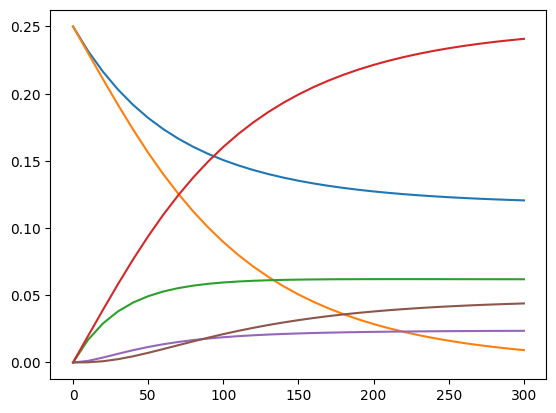

In [15]:
plt.plot(time, c_normal)

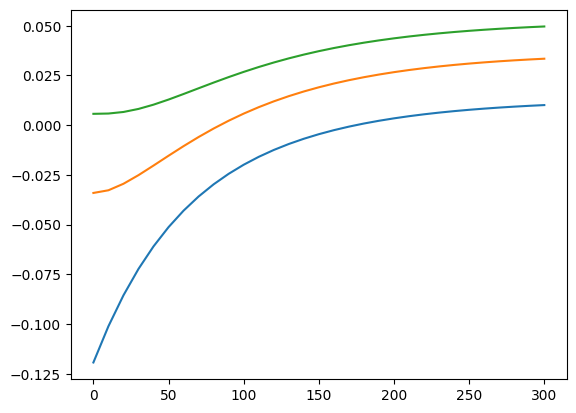

In [16]:
plt.plot(time, xr_normal)

In [17]:
xr_normal

array([[-0.11931818, -0.03409091,  0.00568182],
       [-0.10110411, -0.03274789,  0.00583269],
       [-0.08555342, -0.02947822,  0.00661593],
       [-0.07228271, -0.02514417,  0.00814589],
       [-0.06095454, -0.02032161,  0.0102915 ],
       [-0.05127365, -0.01538193,  0.01285605],
       [-0.04298528, -0.0105543 ,  0.01565381],
       [-0.03587251, -0.00597172,  0.01853599],
       [-0.02975244, -0.001704  ,  0.02139413],
       [-0.02447183,  0.00221948,  0.0241547 ],
       [-0.0199027 ,  0.00579444,  0.02677149],
       [-0.01593831,  0.00903154,  0.02921836],
       [-0.01248955,  0.01194978,  0.03148336],
       [-0.00948188,  0.01457233,  0.03356418],
       [-0.00685281,  0.01692392,  0.03546482],
       [-0.00454976,  0.01902922,  0.03719323],
       [-0.00252831,  0.02091196,  0.03875963],
       [-0.00075085,  0.02259437,  0.04017542],
       [ 0.00081464,  0.02409701,  0.0414524 ],
       [ 0.00219548,  0.02543861,  0.04260224],
       [ 0.00341509,  0.0266362 ,  0.043

## semi batch example

In [38]:
n_pts = 240 # total number of data points

t_pts = np.linspace(0,120,n_pts).reshape(-1,1) # 0 to 120 secs

uin_1 = 2.5*np.exp(-0.0125*t_pts) # gms/sec
uin_1 = uin_1.reshape(-1,1)

uin_2 = 2.5*np.exp(-0.025*t_pts) # gms/sec
uin_2 = uin_2.reshape(-1,1)


uin_mat = np.concatenate((uin_1,uin_2),axis=1) # gms/sec
df_uin = pd.DataFrame( np.hstack((t_pts,uin_mat))  )



In [39]:
from scipy.interpolate import interp1d

N = [
    [-1, -1,  1,  1,  0,  0],
    [ 0, -1, -1,  1,  1,  0],
    [ 0, -1,  0,  1, -1,  1]
]

n0 = np.array([0.25, 0.25, 0, 0, 0, 0])

Mw = np.diag([67, 84, 151, 168, 84, 84 + 151]) /1000

time = np.linspace(0.0, 300, 31)

uin_data = np.zeros((len(time), 2))
uin_data[:, 0] = 0.002 * np.exp(-0.01 * time)   # A feed
uin_data[:, 1] = 0.002 * np.exp(-0.015 * time)  # B feed



uin_df = pd.DataFrame(
    uin_data,           # shape: (nt, P)
    index=time          # numeric time index
)

uin = uin_df

Winhat = np.array([
    [1, 0],  # A
    [0, 1],  # B
    [0, 0],  # C
    [0, 0],  # D
    [0, 0],  # E
    [0, 0],  # F
])

rho = 1000.0  # g/L
V0 = 1.0      # L

uin_sum = np.sum(uin_data, axis=1)
dt = time[1] - time[0]

V_data = V0 + np.cumsum(uin_sum) * dt / rho

# IMPORTANT: dict must be {time: value}
V = dict(zip(time, V_data))


sim = Simulate(
    N=N,
    Mw=Mw,
    V=V,
    Winhat=Winhat,
    uin=uin*1000,
    uout=0,
    n0=n0,
    config="semi-batch"
)


In [40]:
cand_ratelaws1 = CandidateRateLaws(N[0], type="Irreversible")
cand_ratelaws2 = CandidateRateLaws(N[1], type="Irreversible")
cand_ratelaws3 = CandidateRateLaws(N[2], type="Irreversible")

sim.add_ratelaws(
    [cand_ratelaws1[2], cand_ratelaws2[2], cand_ratelaws3[2]],
    [[0.0315], [0.0638], [0.1505]]
)


In [41]:
results_semi = sim.run_simulation(time, alpha=1)

c_semi  = results_semi["moles"]
f_semi  = results_semi["flow_rate"]
r_semi  = results_semi["reaction_rate"]
xr_semi = results_semi["xr"]
xin_semi = results_semi["xin"]
xout_semi = results_semi["xout"]


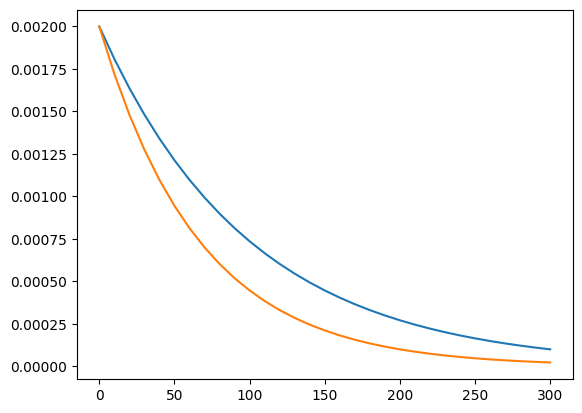

In [42]:
plt.plot(uin)

In [43]:
uin_sum

array([0.004     , 0.00353109, 0.0031191 , 0.00275689, 0.00243826,
       0.00215779, 0.00191076, 0.00169305, 0.00150105, 0.00133162,
       0.00118202, 0.00104984, 0.00093299, 0.00082961, 0.00073811,
       0.00065706, 0.00058523, 0.00052153, 0.00046501, 0.00041483,
       0.00037024, 0.00033062, 0.00029537, 0.00026401, 0.00023608,
       0.00021121, 0.00018903, 0.00016926, 0.00015161, 0.00013586,
       0.00012179])

In [44]:
xr_normal

array([[-0.11931818, -0.03409091,  0.00568182],
       [-0.10110411, -0.03274789,  0.00583269],
       [-0.08555342, -0.02947822,  0.00661593],
       [-0.07228271, -0.02514417,  0.00814589],
       [-0.06095454, -0.02032161,  0.0102915 ],
       [-0.05127365, -0.01538193,  0.01285605],
       [-0.04298528, -0.0105543 ,  0.01565381],
       [-0.03587251, -0.00597172,  0.01853599],
       [-0.02975244, -0.001704  ,  0.02139413],
       [-0.02447183,  0.00221948,  0.0241547 ],
       [-0.0199027 ,  0.00579444,  0.02677149],
       [-0.01593831,  0.00903154,  0.02921836],
       [-0.01248955,  0.01194978,  0.03148336],
       [-0.00948188,  0.01457233,  0.03356418],
       [-0.00685281,  0.01692392,  0.03546482],
       [-0.00454976,  0.01902922,  0.03719323],
       [-0.00252831,  0.02091196,  0.03875963],
       [-0.00075085,  0.02259437,  0.04017542],
       [ 0.00081464,  0.02409701,  0.0414524 ],
       [ 0.00219548,  0.02543861,  0.04260224],
       [ 0.00341509,  0.0266362 ,  0.043

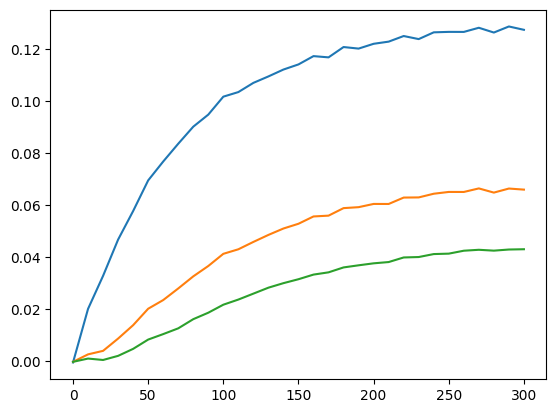

In [45]:
plt.plot(time,xr_semi)

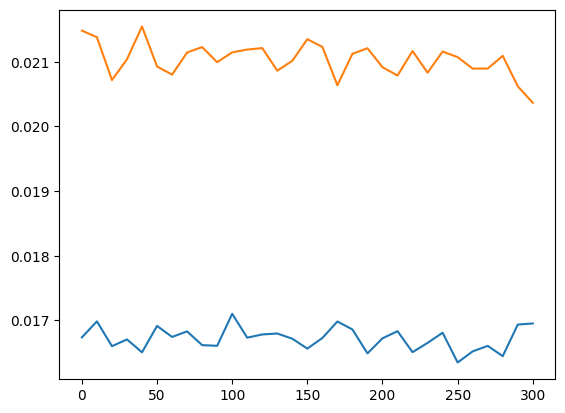

In [46]:
plt.plot(time,xin_semi)